              ***Projet de Maching Learning: Classification Binaire d'échantillon via SVM et Régression Logistique***

**1.Préparation du dataset, Analyse exploratoire et prétraitement des données**

In [39]:
#Importation des bibliotèques nécessaires au projet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, r2_score,accuracy_score,confusion_matrix

In [40]:
file_path = '/content/colon_cancer.csv'
df = pd.read_csv(file_path)
df.head(804)

id_sample;ADH1C;DHRS11;UGP2;SLC7A5;CTSS;DAO;NIBAN1;PRUNE2;FOXF2;TENT5C;KLF10;FABP1;RPSAP19;NCAPH;TPM1;PLA2G12B;PLAAT4;IGLV8-61;GSS;L1TD1;RNF186;HES2;MXRA8;SOX18;NDFIP2;SIAE;NEURL1B;DDIT4;TRPM4;RETREG1;OTULINL;CPVL;SAMD9;ANKRD40CL;EPN3;CRYBG2;GIPC2;P3H2;STEAP3;THNSL2;TRAPPC14;RHBDL2;RPP25;SEMA4C;RNF43;EPS8L1;TOR4A;PAQR5;SIDT1;ESRP1;SYTL2;BSPRY;CDHR2;ERRFI1;CLIC5;PLLP;GAL;CRYL1;YBX2;ANGPTL4;tissue_status
0    EPSM-COLON-0001;9.199944;6.090054;7.0625119999...                                                                                                                                                                                                                                                                                                                                                                   
1    EPSM-COLON-0002;7.767617666666666;6.0279847575...                                                                                                                                                                                                                                                                                                                                                                   
2    EPSM-COLON-0003;7.918904232323233;5.8859481515...                                                                                                                                                                                                                                                                                                                                                                   
3    EPSM-COLON-0004;9.053553474747474;6.0279847575...                                                                                                                                                                                                                                                                                                                                                                   
4    EPSM-COLON-0005;6.027822161616162;5.7912570808...                                                                                                                                                                                                                                                                                                                                                                   
..                                                 ...                                                                                                                                                                                                                                                                                                                                                                   
799  EPSM-COLON-0800;6.0199625;3.0893634999999997;4...                                                                                                                                                                                                                                                                                                                                                                   
800  EPSM-COLON-0801;3.6916055;2.1181645;4.7947875;...                                                                                                                                                                                                                                                                                                                                                                   
801  EPSM-COLON-0802;3.0352425;2.4953835;4.43845149...                                                                                                                                                                                                                                                                    

In [41]:
#Chargement, reformatage et aperçu des caractéristiques des données de la dataset
file_path = '/content/colon_cancer.csv'
df = pd.read_csv(file_path,delimiter=';')
df.head(4)

id_sample     ADH1C    DHRS11      UGP2    SLC7A5      CTSS  \
0  EPSM-COLON-0001  9.199944  6.090054  7.062512  3.864253  7.869368   
1  EPSM-COLON-0002  7.767618  6.027985  6.318818  3.069581  6.410334   
2  EPSM-COLON-0003  7.918904  5.885948  6.917742  3.188257  7.915549   
3  EPSM-COLON-0004  9.053553  6.027985  7.081085  2.357523  5.657726   

        DAO    NIBAN1    PRUNE2     FOXF2  ...     BSPRY     CDHR2    ERRFI1  \
0  8.465133  1.174665  0.975086  3.028995  ...  5.528372  3.500730  2.893760   
1  8.159814  5.959414  1.625518  2.984629  ...  5.671788  4.658790  4.715374   
2  8.004194  1.560386  2.379909  2.929762  ...  4.596079  5.649376  4.047899   
3  8.004194  3.548988  3.260031  3.313829  ...  4.135061  5.437107  4.537381   

      CLIC5      PLLP       GAL     CRYL1      YBX2   ANGPTL4  tissue_status  
0  5.130743  1.485110  1.830484  6.379933  3.919293  3.031413         normal  
1  5.438104  2.131466  2.097157  6.863173  0.322829  3.978531         normal  
2  6.580938  1.447209  3.890943  6.209704  3.274407  3.714491         normal  
3  4.615263  1.004454  1.840902  6.774063  3.320525  3.080796         normal  

[4 rows x 62 columns]

In [42]:
#Informations générales sur les colonnes de la dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_sample      804 non-null    object 
 1   ADH1C          804 non-null    float64
 2   DHRS11         804 non-null    float64
 3   UGP2           804 non-null    float64
 4   SLC7A5         804 non-null    float64
 5   CTSS           804 non-null    float64
 6   DAO            804 non-null    float64
 7   NIBAN1         804 non-null    float64
 8   PRUNE2         804 non-null    float64
 9   FOXF2          804 non-null    float64
 10  TENT5C         804 non-null    float64
 11  KLF10          804 non-null    float64
 12  FABP1          804 non-null    float64
 13  RPSAP19        804 non-null    float64
 14  NCAPH          804 non-null    float64
 15  TPM1           804 non-null    float64
 16  PLA2G12B       804 non-null    float64
 17  PLAAT4         804 non-null    float64
 18  IGLV8-61  

In [43]:
#Identification du nombre de valeurs manquantes
df.isnull().sum()

id_sample        0
ADH1C            0
DHRS11           0
UGP2             0
SLC7A5           0
                ..
GAL              0
CRYL1            0
YBX2             0
ANGPTL4          0
tissue_status    0
Length: 62, dtype: int64

In [44]:
#Types de données contenues dans chaque colonne
df.dtypes

id_sample         object
ADH1C            float64
DHRS11           float64
UGP2             float64
SLC7A5           float64
                  ...   
GAL              float64
CRYL1            float64
YBX2             float64
ANGPTL4          float64
tissue_status     object
Length: 62, dtype: object

In [45]:
#Vue sur les étiquettes de colonnes
df.columns

Index(['id_sample', 'ADH1C', 'DHRS11', 'UGP2', 'SLC7A5', 'CTSS', 'DAO',
       'NIBAN1', 'PRUNE2', 'FOXF2', 'TENT5C', 'KLF10', 'FABP1', 'RPSAP19',
       'NCAPH', 'TPM1', 'PLA2G12B', 'PLAAT4', 'IGLV8-61', 'GSS', 'L1TD1',
       'RNF186', 'HES2', 'MXRA8', 'SOX18', 'NDFIP2', 'SIAE', 'NEURL1B',
       'DDIT4', 'TRPM4', 'RETREG1', 'OTULINL', 'CPVL', 'SAMD9', 'ANKRD40CL',
       'EPN3', 'CRYBG2', 'GIPC2', 'P3H2', 'STEAP3', 'THNSL2', 'TRAPPC14',
       'RHBDL2', 'RPP25', 'SEMA4C', 'RNF43', 'EPS8L1', 'TOR4A', 'PAQR5',
       'SIDT1', 'ESRP1', 'SYTL2', 'BSPRY', 'CDHR2', 'ERRFI1', 'CLIC5', 'PLLP',
       'GAL', 'CRYL1', 'YBX2', 'ANGPTL4', 'tissue_status'],
      dtype='object')

In [46]:
#Vérification de l'équilibre des classes
df["tissue_status"].value_counts()

tissue_status
normal     402
tumoral    402
Name: count, dtype: int64

In [47]:
#Identification des doublons
df["id_sample"].unique().size

804

In [48]:
#Numérisation de la colonne cible
dict={'normal': 0, 'tumoral': 1}
df['tissue_status']=df['tissue_status'].map(dict)
df['tissue_status']

0      0
1      0
2      0
3      0
4      0
      ..
799    1
800    1
801    1
802    1
803    1
Name: tissue_status, Length: 804, dtype: int64

In [49]:
#supression de la colonne identifiant
df = df.drop(['id_sample'], axis=1)
genes=df.drop(['tissue_status'],axis=1)
target=df['tissue_status']

**2.Exploration et visualisation de la distribution des données**

In [50]:
#Analyse statistique descriptive
genes.describe()

ADH1C      DHRS11        UGP2      SLC7A5        CTSS         DAO  \
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000   
mean     5.588943    4.354817    5.557694    4.513570    6.717535    7.218184   
std      2.889901    1.431179    1.150565    1.614450    1.077821    1.411969   
min      0.610504    1.427079    2.027201    1.685024    3.668691    1.164886   
25%      3.174250    3.118844    4.611060    3.030022    6.065937    6.241714   
50%      5.467024    4.125990    5.412204    4.382953    6.762908    7.578782   
75%      8.444756    5.696566    6.556969    5.918848    7.485487    8.263561   
max     10.263846    7.022241    7.571114    8.059430    8.990703   10.079135   

           NIBAN1      PRUNE2       FOXF2      TENT5C  ...       SYTL2  \
count  804.000000  804.000000  804.000000  804.000000  ...  804.000000   
mean     2.737937    2.806573    3.064394    3.658318  ...    3.599294   
std      1.466906    1.243826    1.191486    1.258059  ...    1.054504   
min      0.716737    0.368200    0.610504    0.858074  ...    1.286220   
25%      1.550382    1.864561    2.198244    2.655091  ...    2.878356   
50%      2.297732    2.741509    2.900393    3.605686  ...    3.613342   
75%      3.669509    3.574304    3.752899    4.686086  ...    4.417632   
max      6.682541    6.591924    6.276628    6.350919  ...    5.713776   

            BSPRY       CDHR2      ERRFI1       CLIC5        PLLP         GAL  \
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000   
mean     4.682718    4.225014    4.575397    4.097244    1.823268    2.822931   
std      0.917027    1.656088    0.859138    1.276589    0.721587    1.338349   
min      1.868389    0.637047    2.250347    1.015235    0.118945    0.610504   
25%      4.349295    2.921069    3.958903    3.131267    1.337715    1.840902   
50%      4.869313    4.116251    4.537381    3.975276    1.689671    2.591044   
75%      5.249372    5.507864    5.070072    5.118110    2.211967    3.661012   
max      7.029946    9.045672    7.647284    7.129499    4.763212    7.545757   

            CRYL1        YBX2     ANGPTL4  
count  804.000000  804.000000  804.000000  
mean     6.096634    2.801603    2.596452  
std      0.840122    1.011971    1.000962  
min      2.031471    0.000000    0.757246  
25%      5.489589    2.277491    1.824823  
50%      6.150297    2.905605    2.442378  
75%      6.728052    3.505721    3.139738  
max      8.723941    5.169059    6.493643  

[8 rows x 60 columns]

tissue_status
0    50.0
1    50.0
Name: proportion, dtype: float64


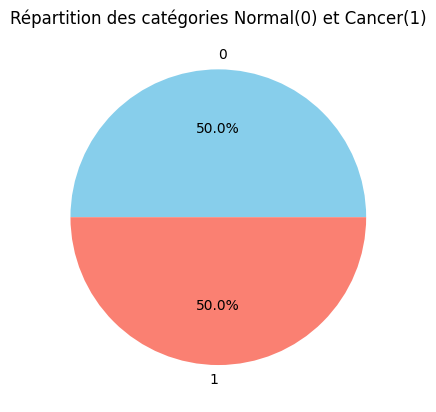

In [51]:

# Calculer les proportions de chaque catégorie
proportions = df['tissue_status'].value_counts(normalize=True) * 100
print(proportions)
# Tracer un diagramme circulaire
df['tissue_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Répartition des catégories Normal(0) et Cancer(1)')
plt.ylabel('')
plt.show()

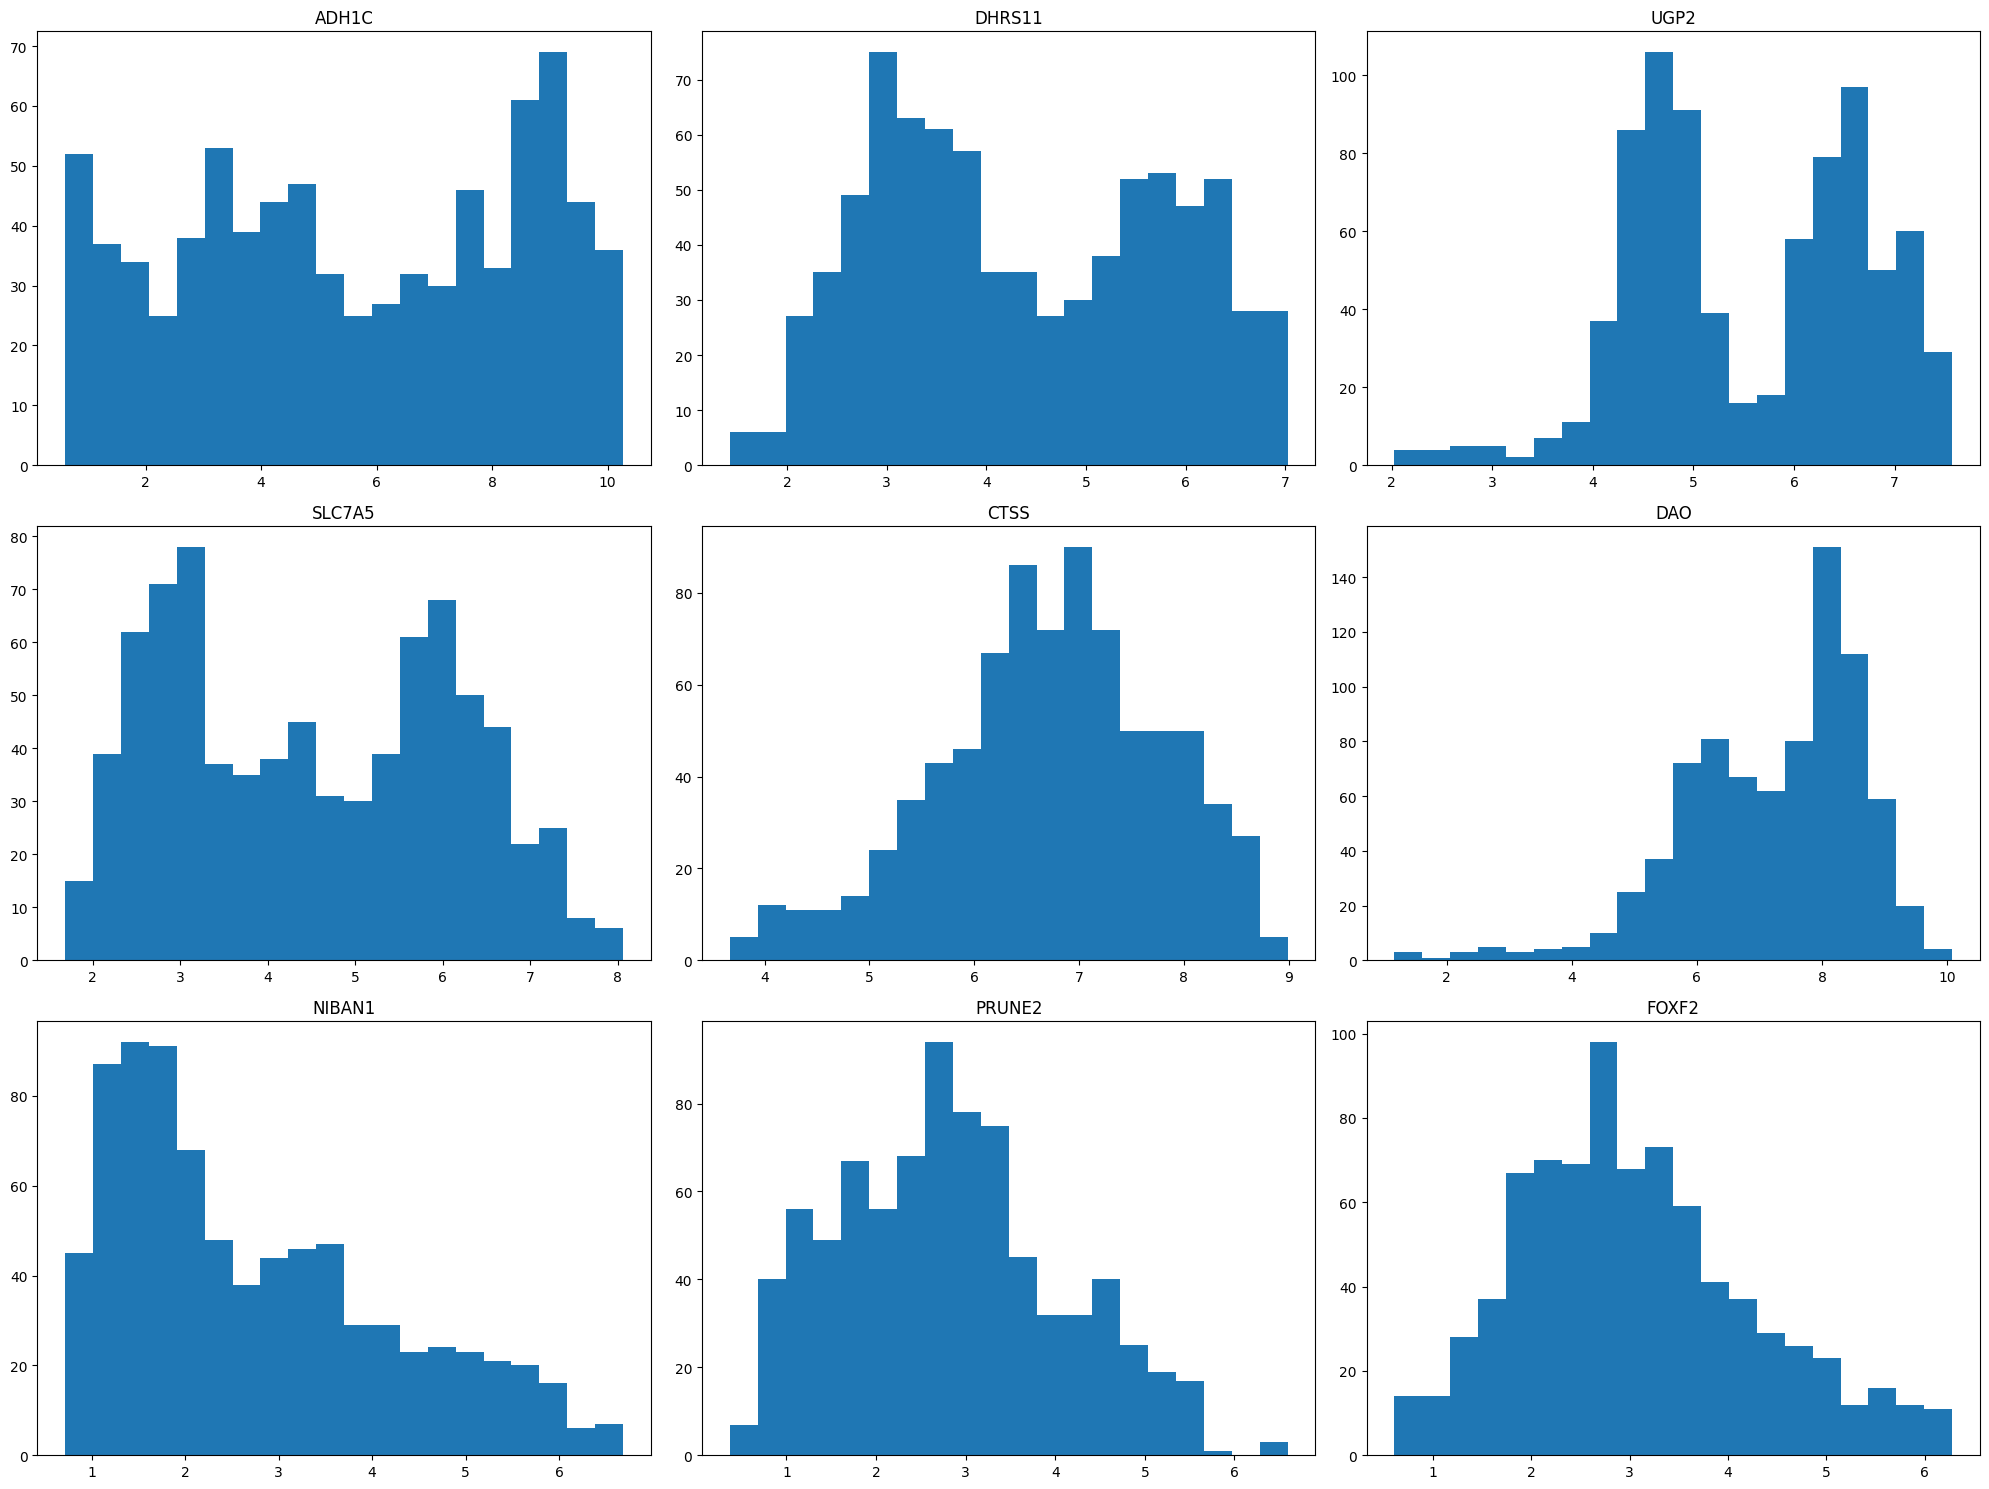

In [52]:
#Histogrammes pour voir la répartition des données
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))  # Adjust grid size
axs = axs.ravel()
for i, col in enumerate(df.columns):
    if i < len(axs):  # Check if enough subplots are available
        axs[i].hist(df[col], bins=20)
        axs[i].set_title(col)

plt.tight_layout()  # Improve spacing between subplots
plt.show()

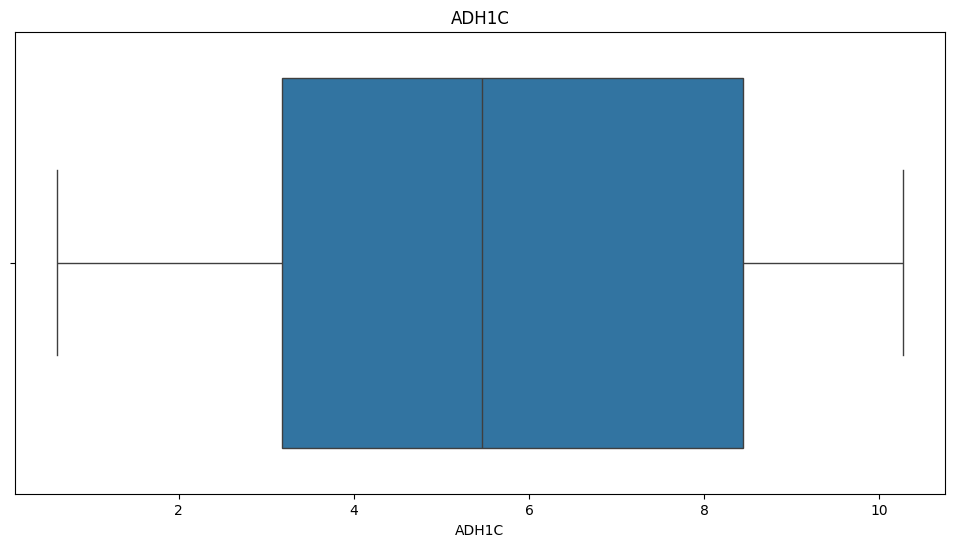

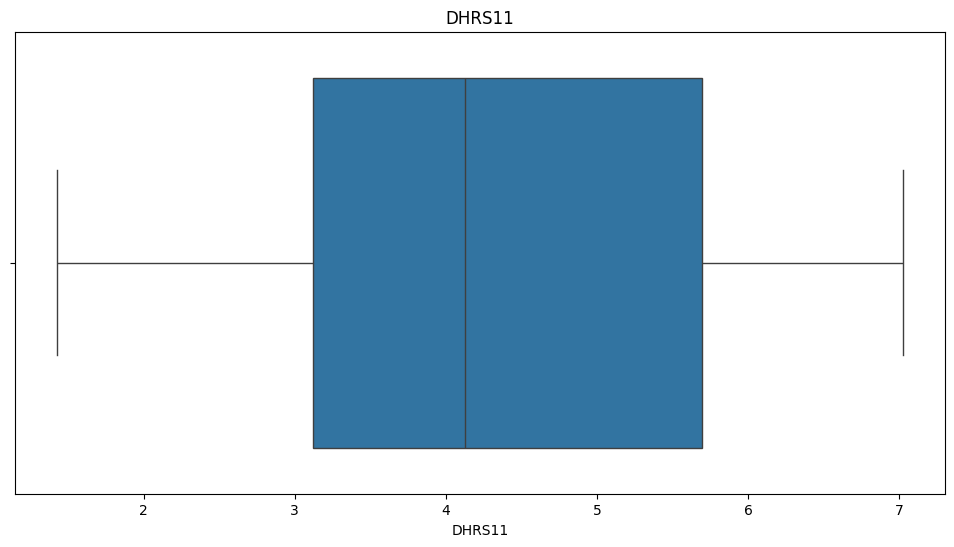

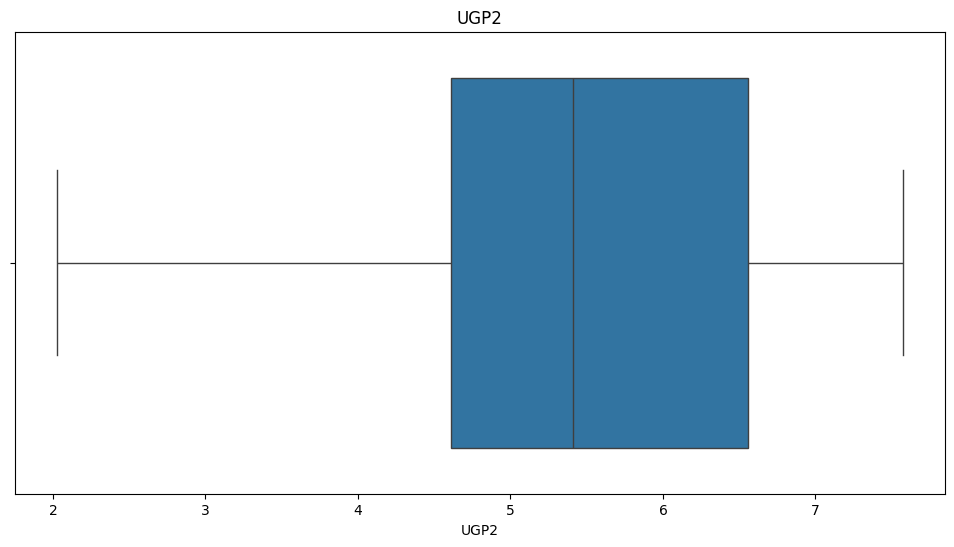

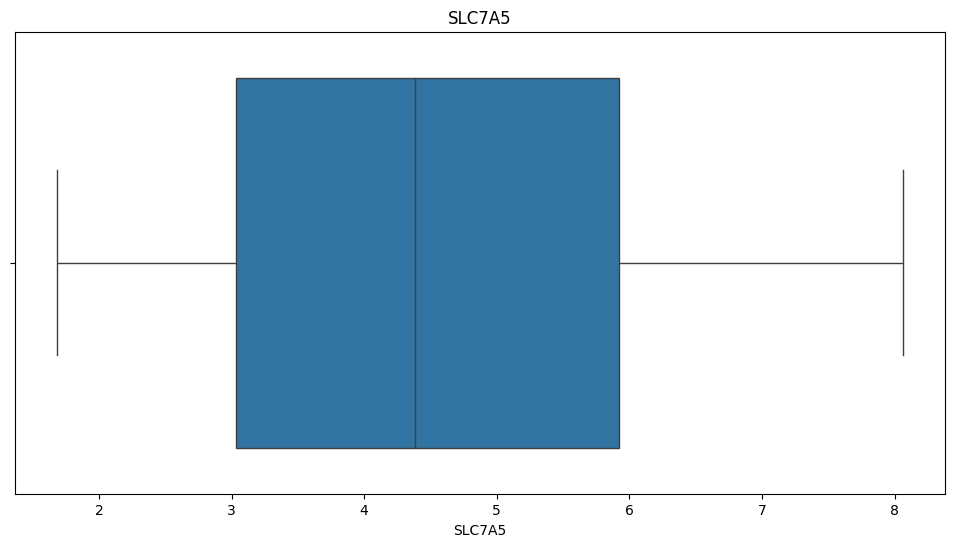

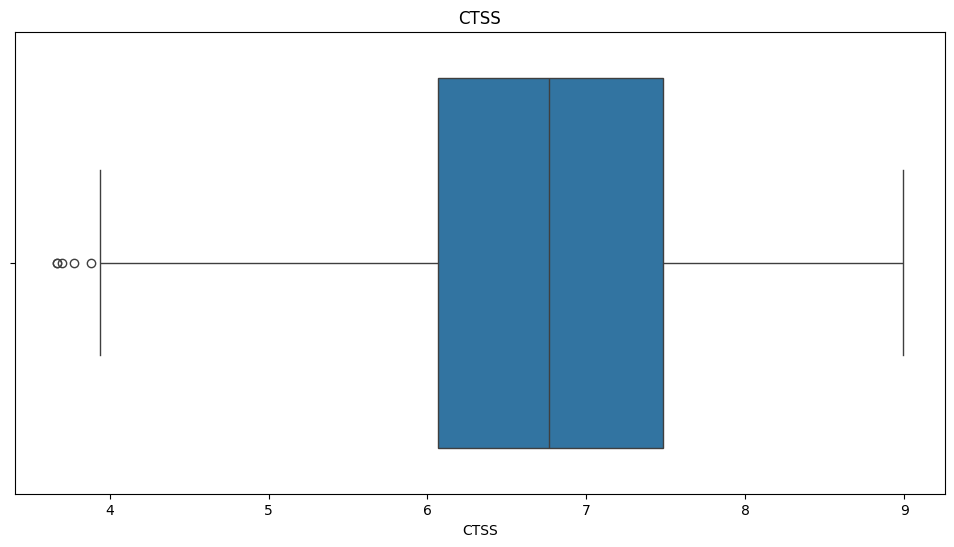

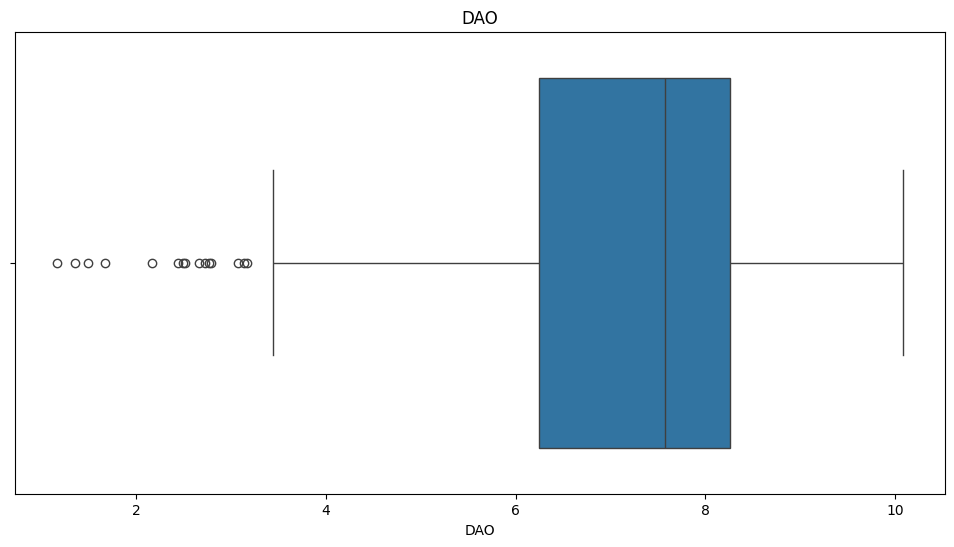

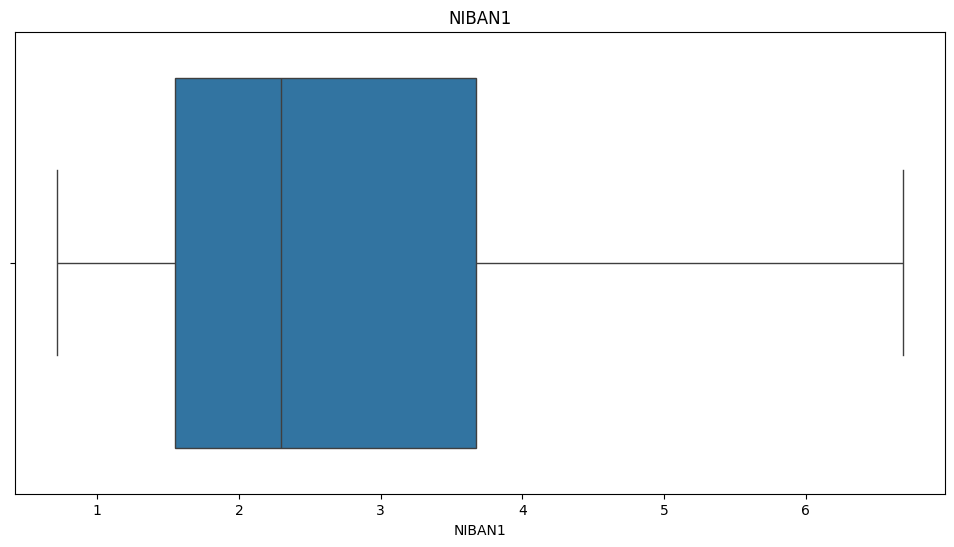

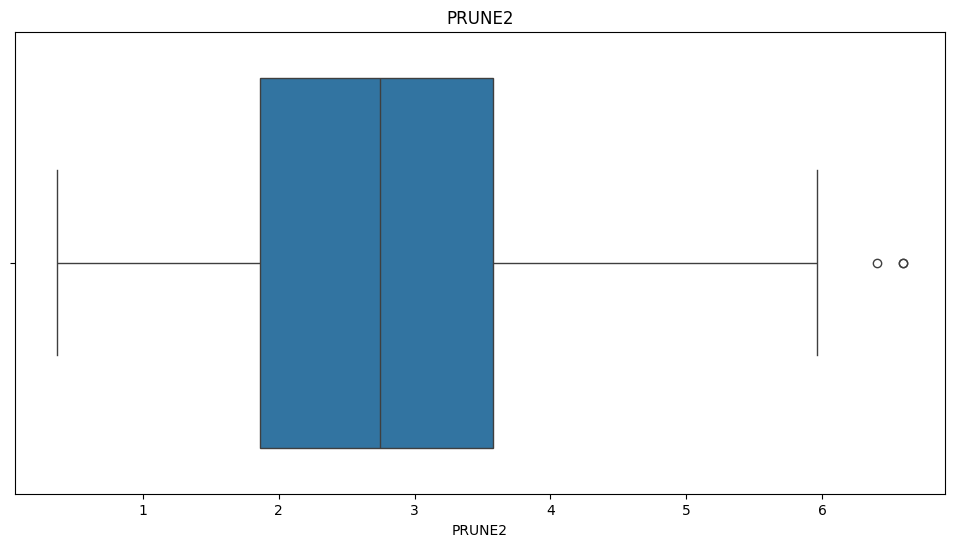

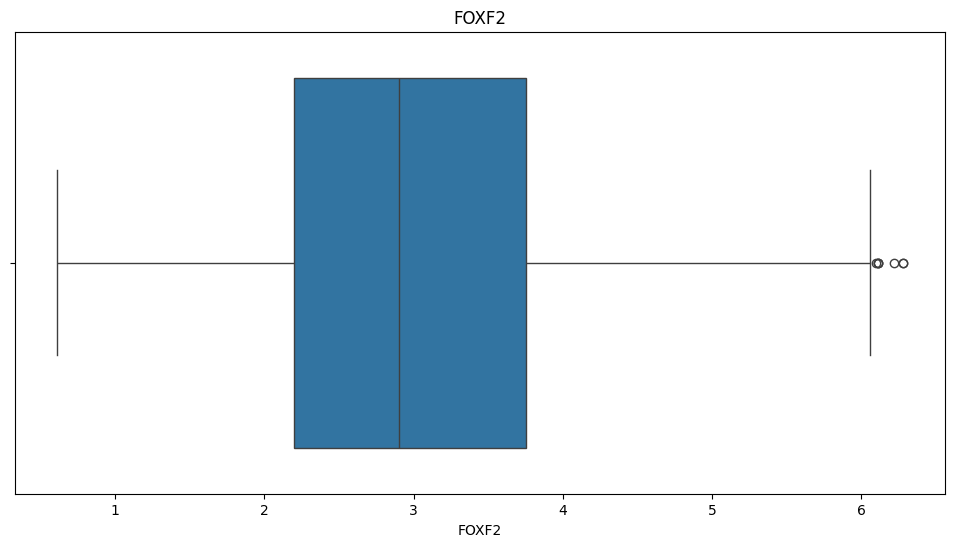

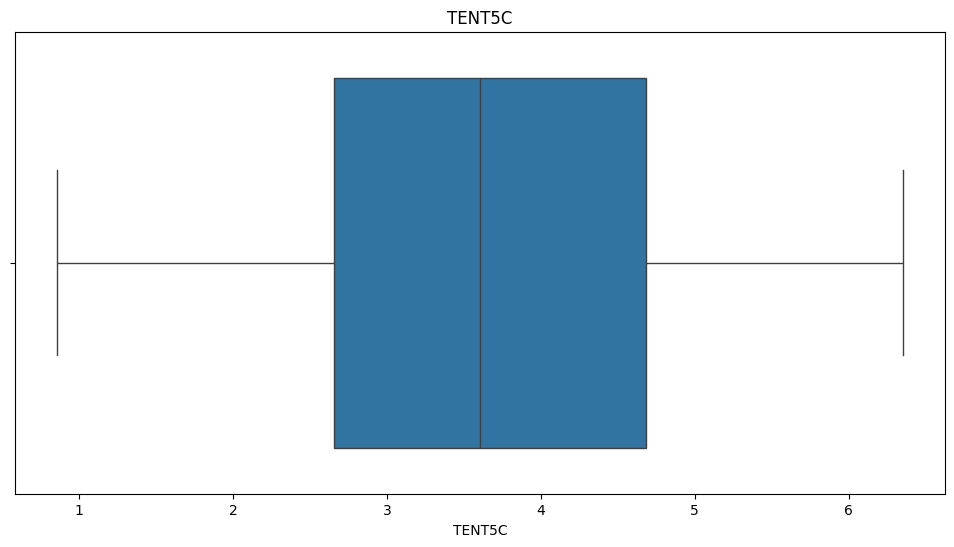

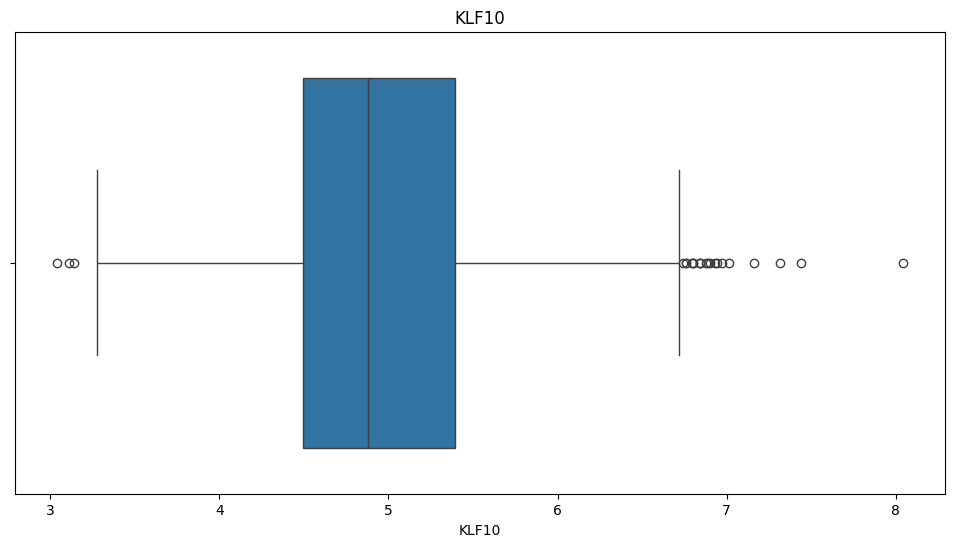

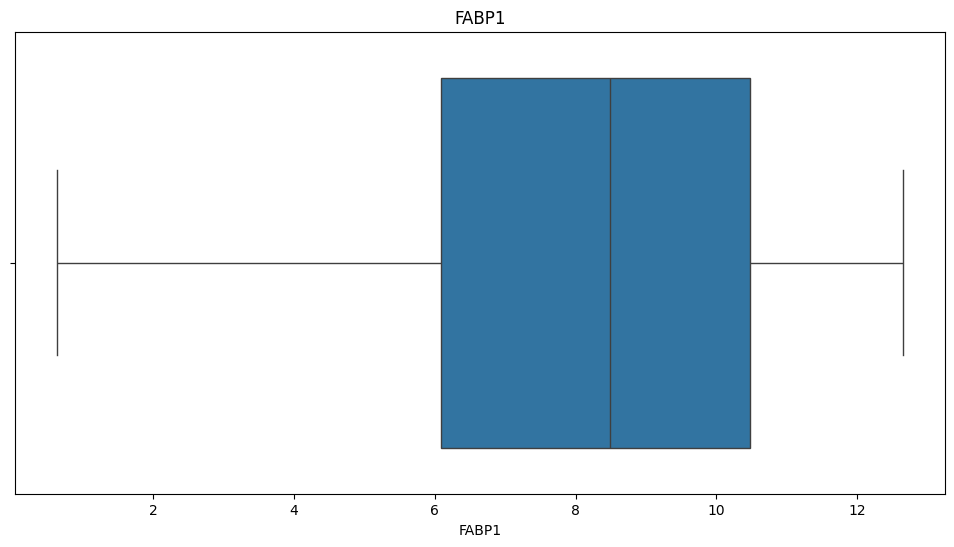

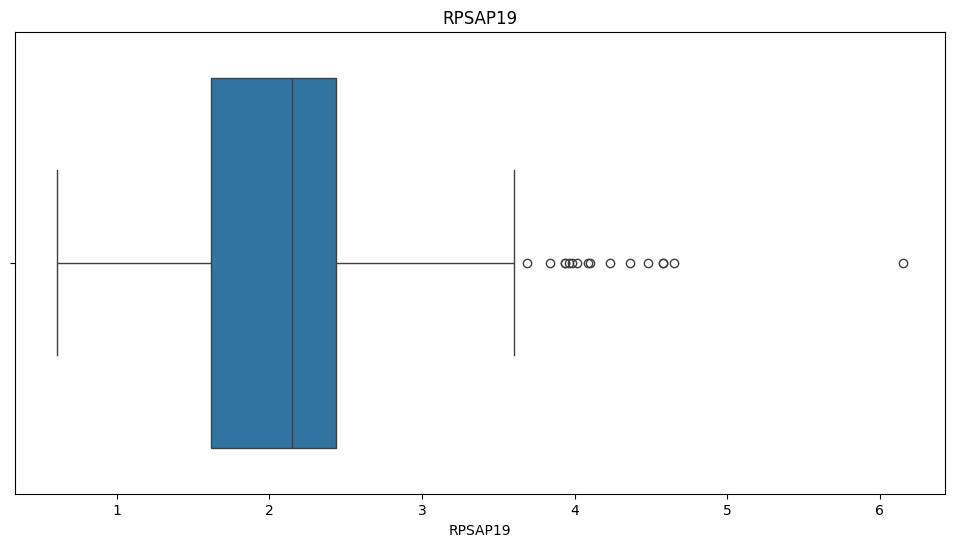

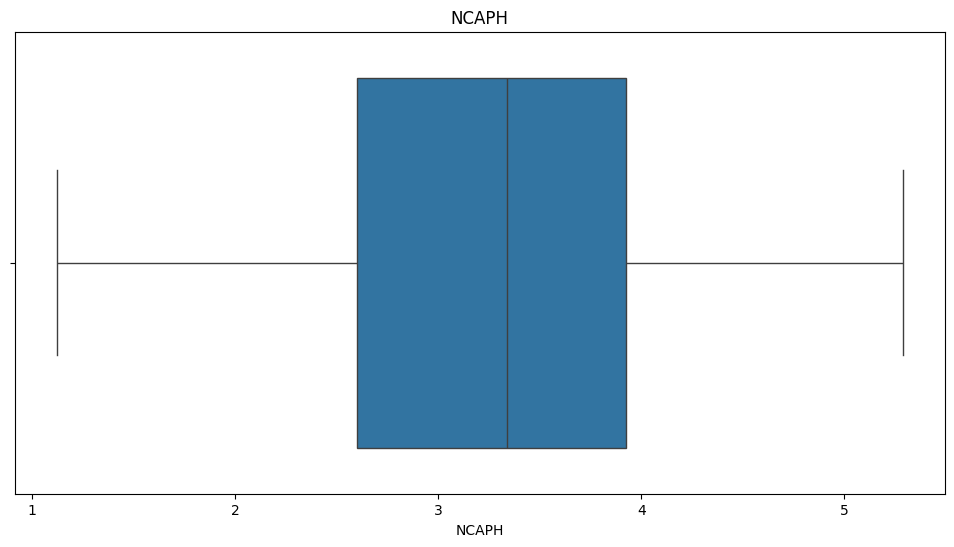

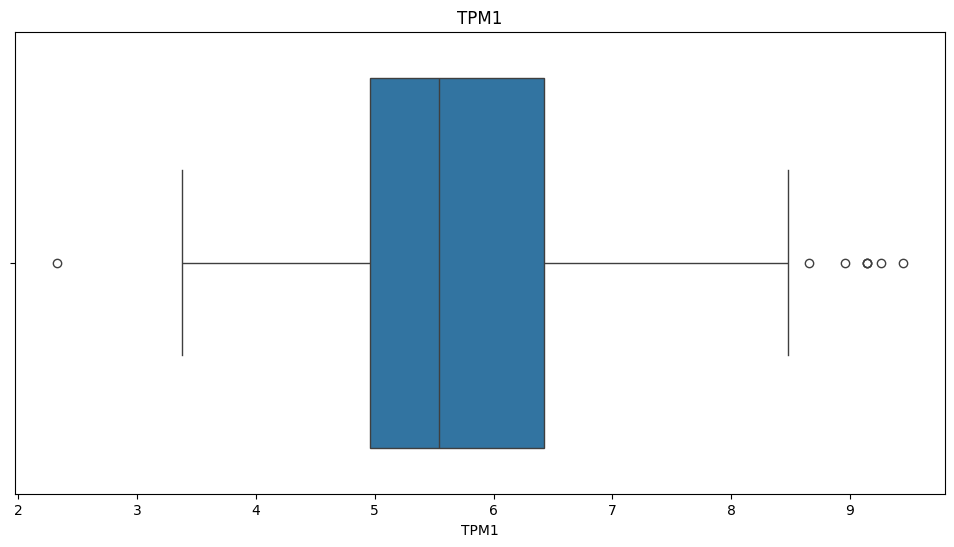

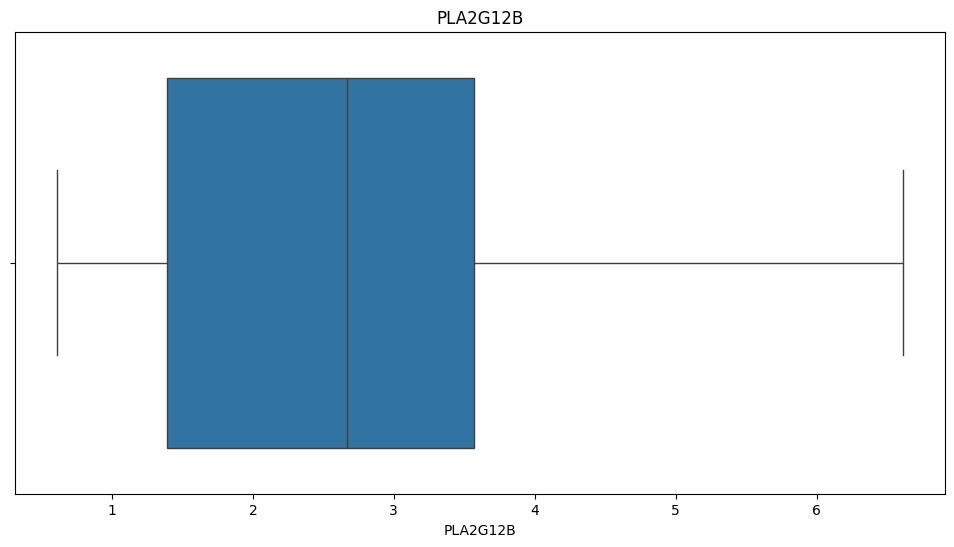

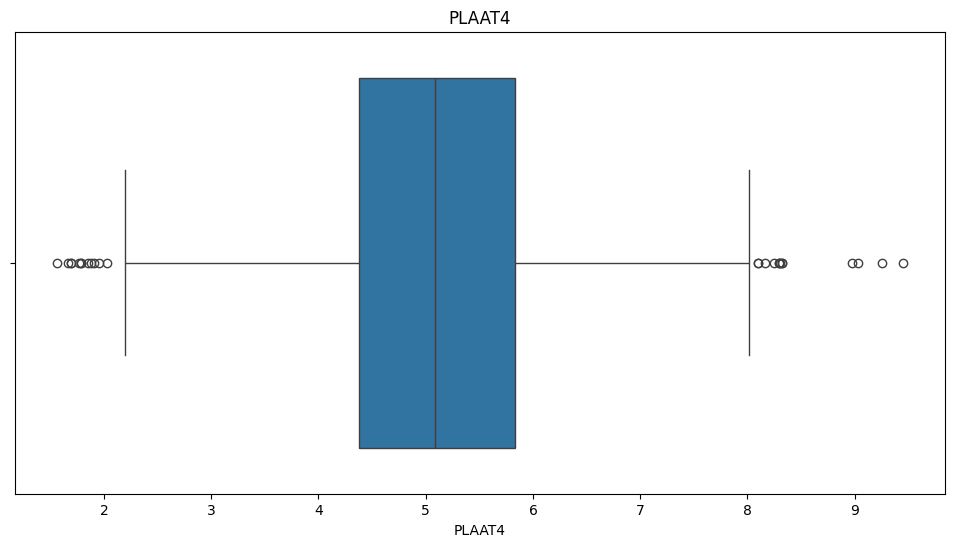

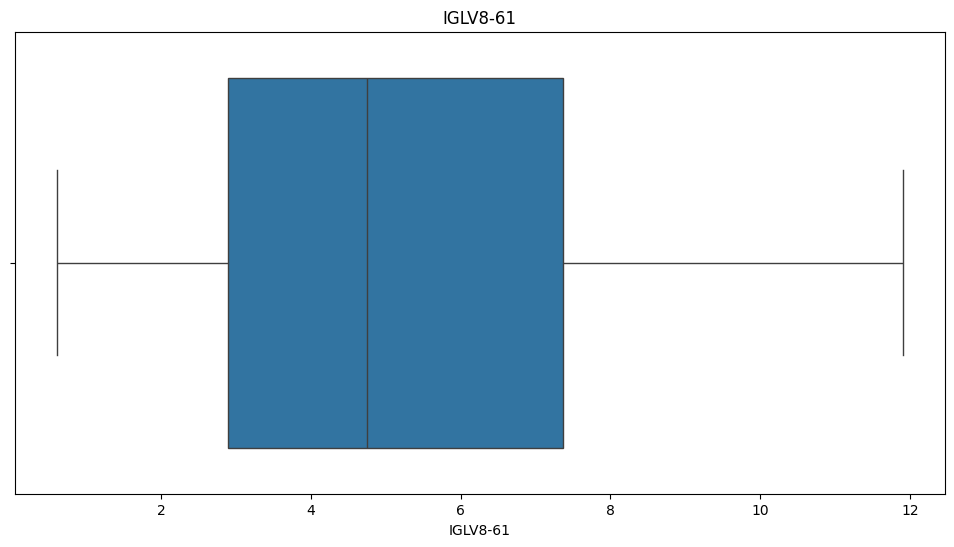

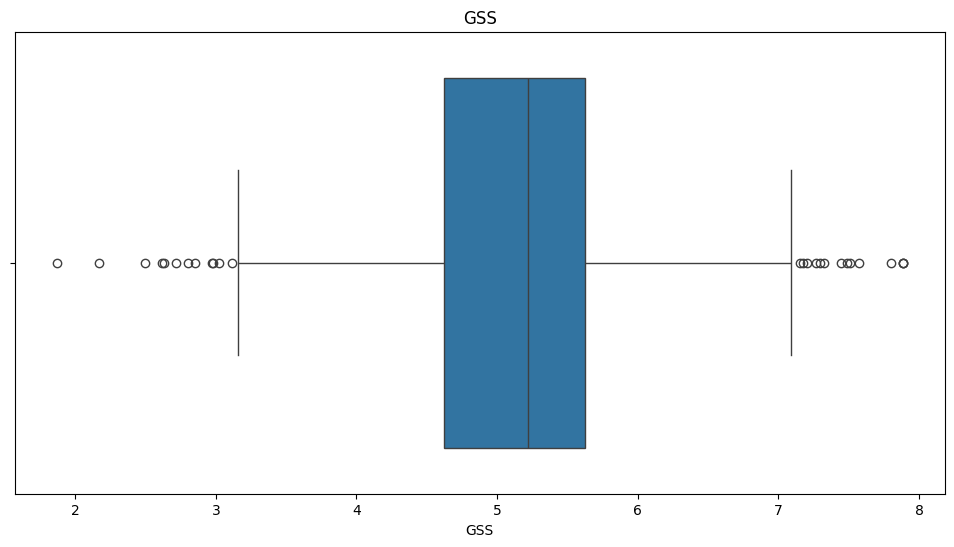

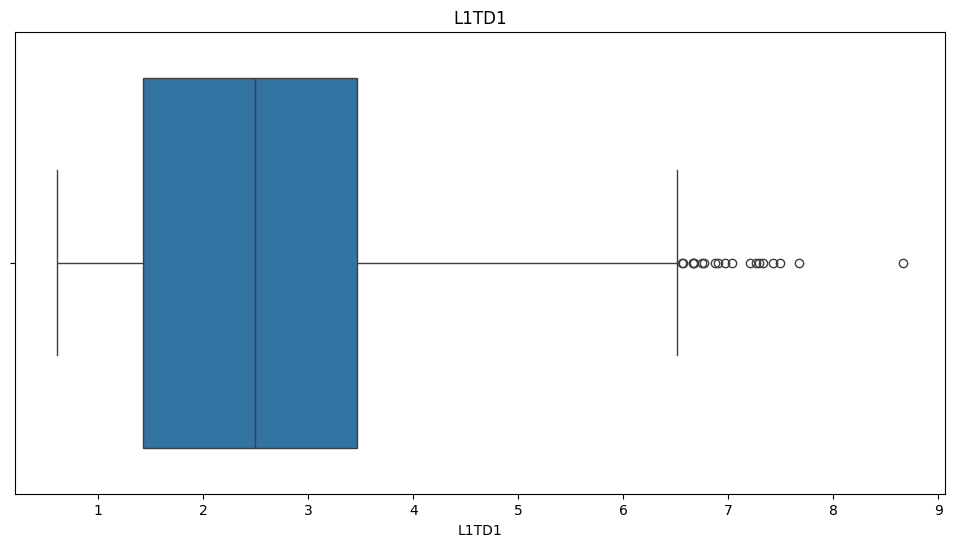

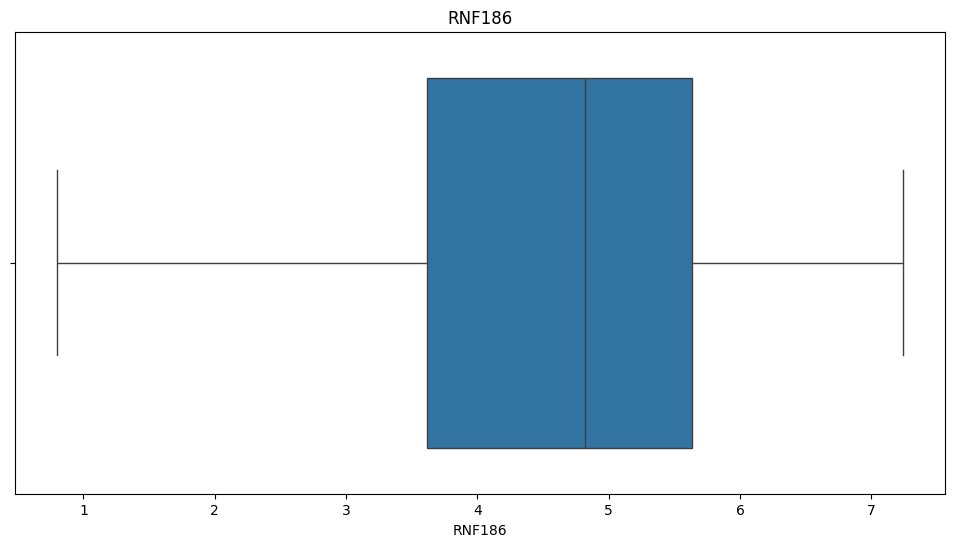

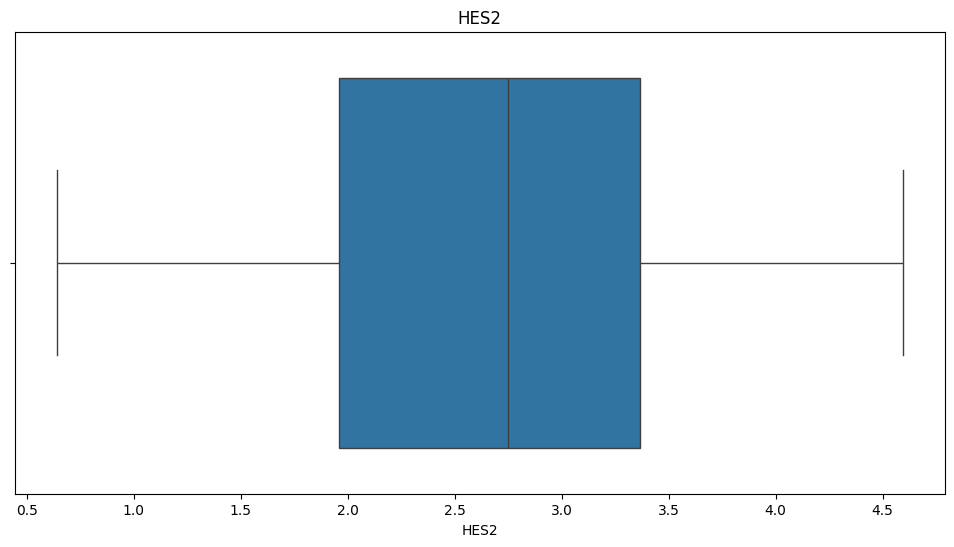

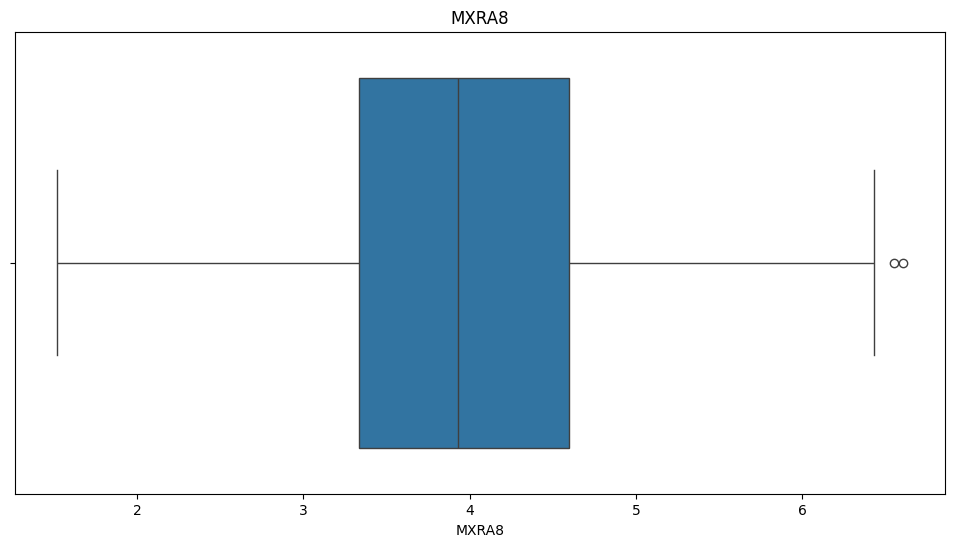

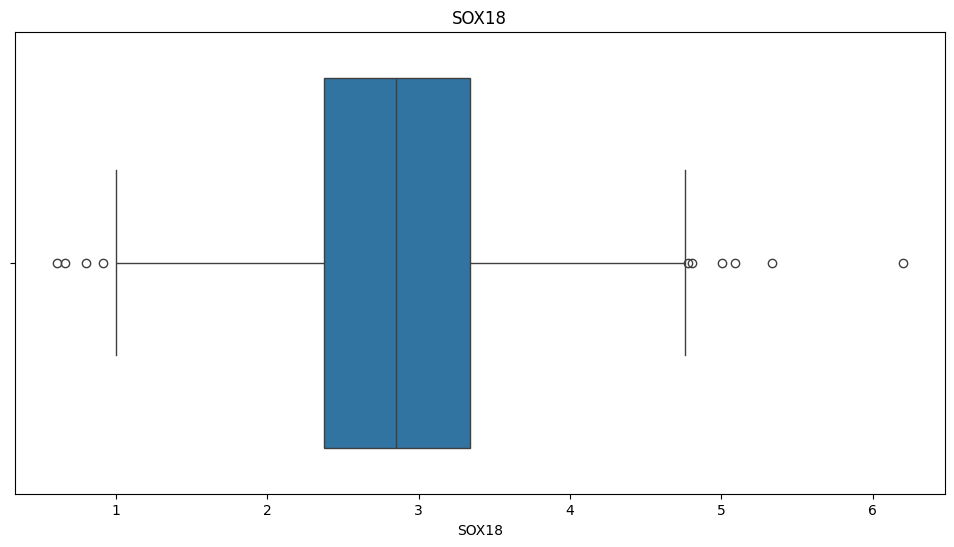

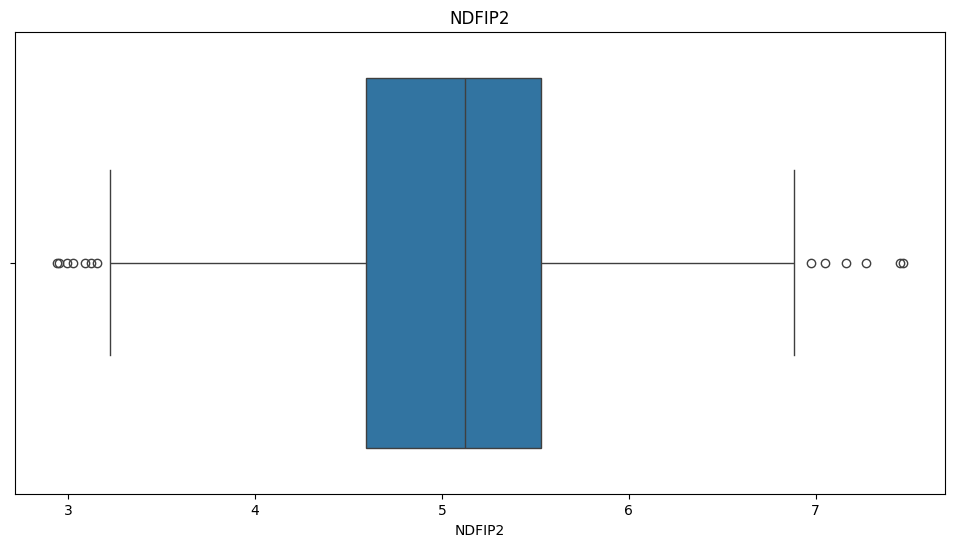

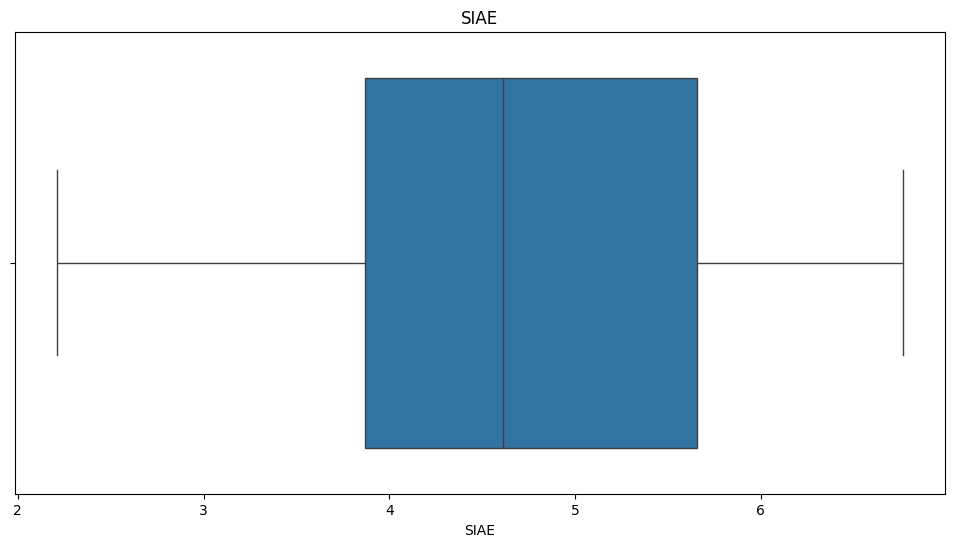

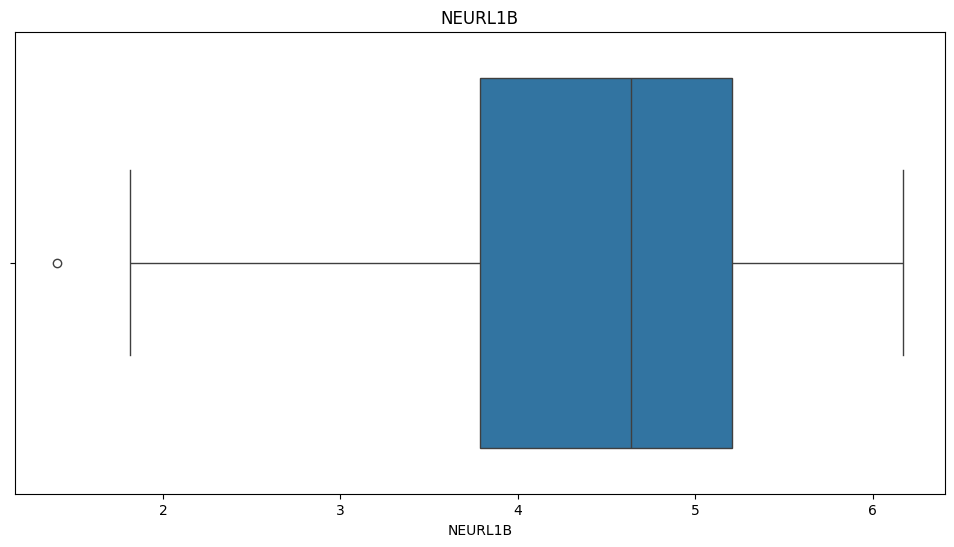

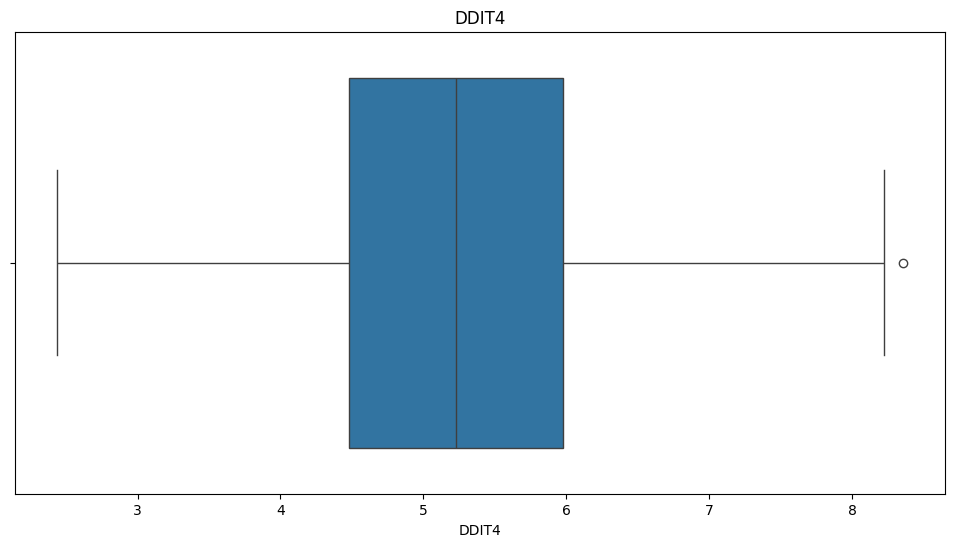

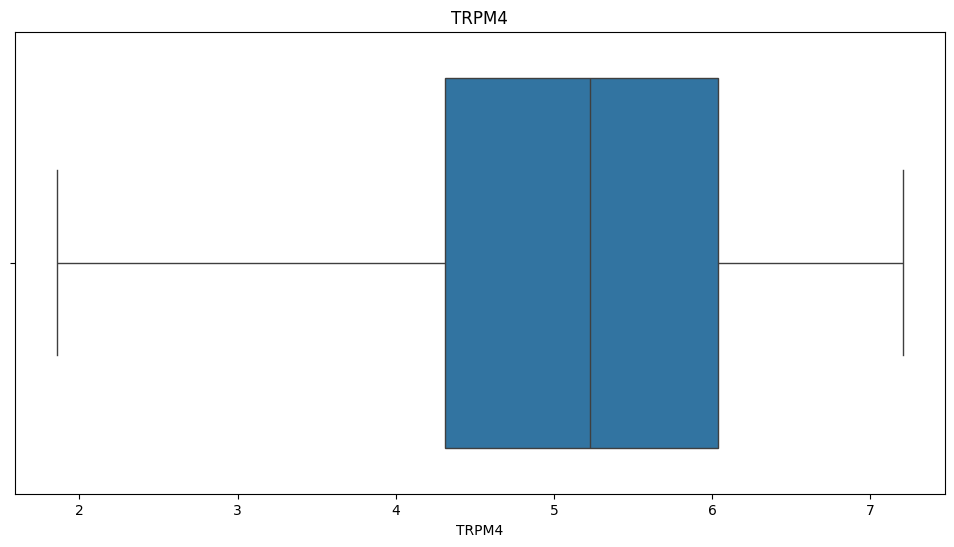

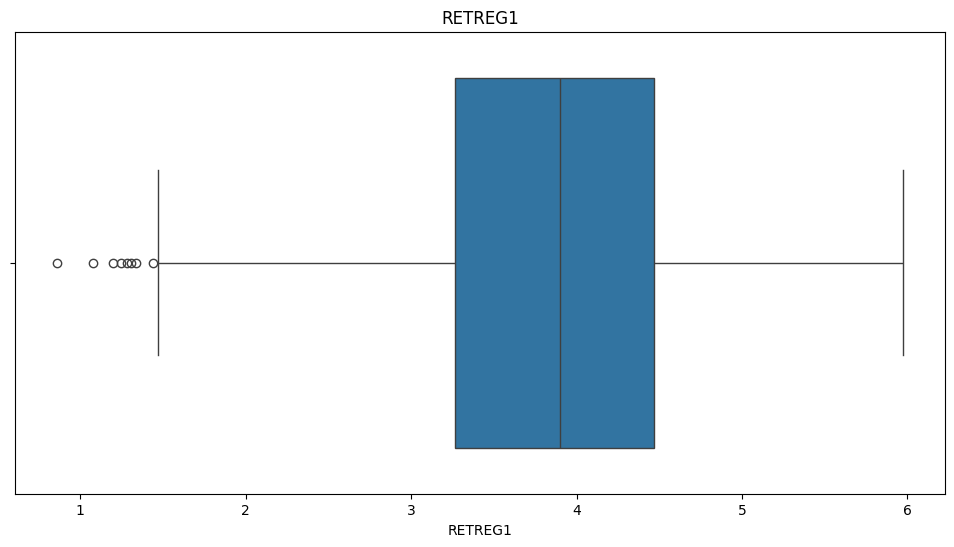

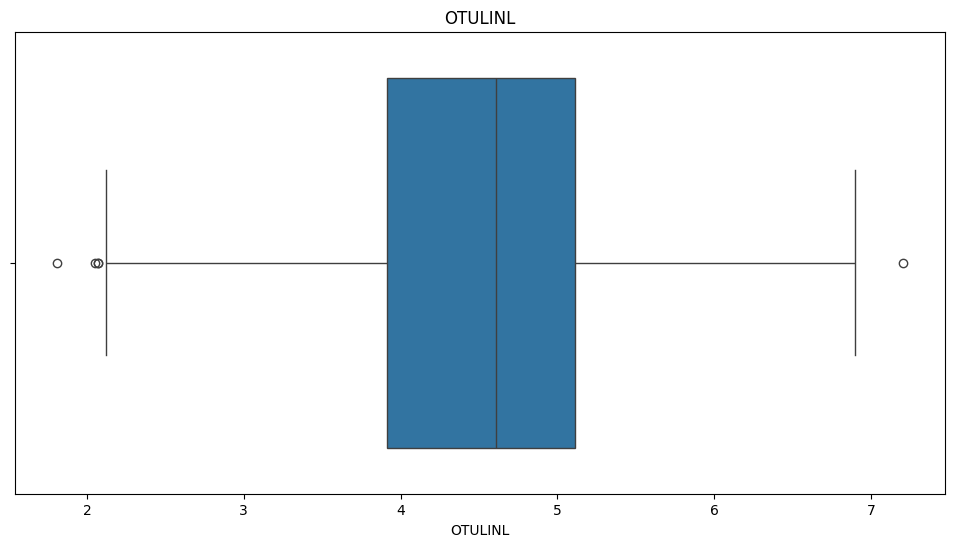

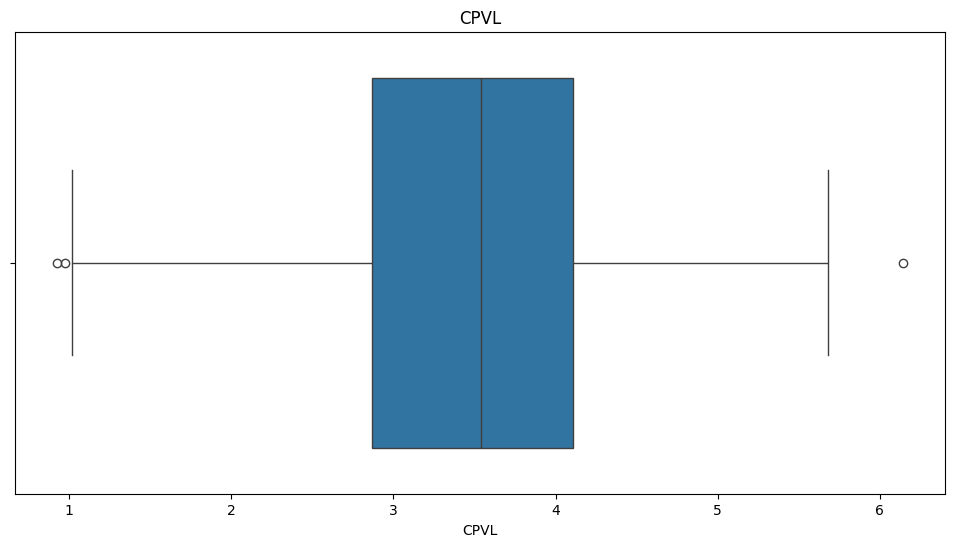

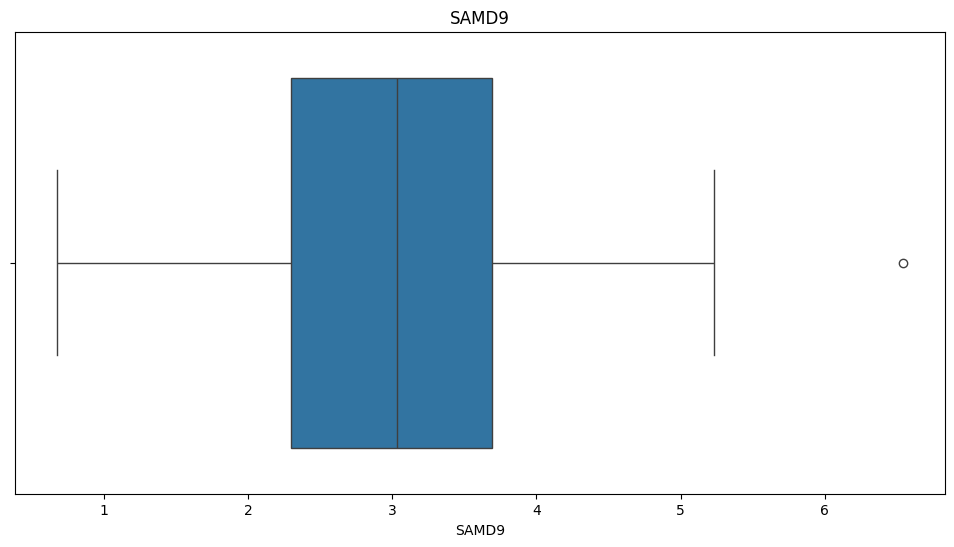

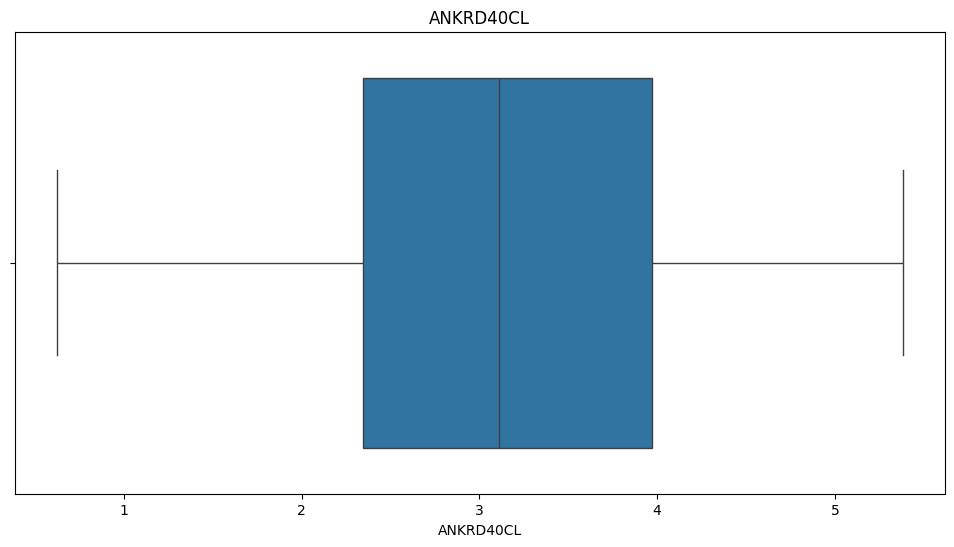

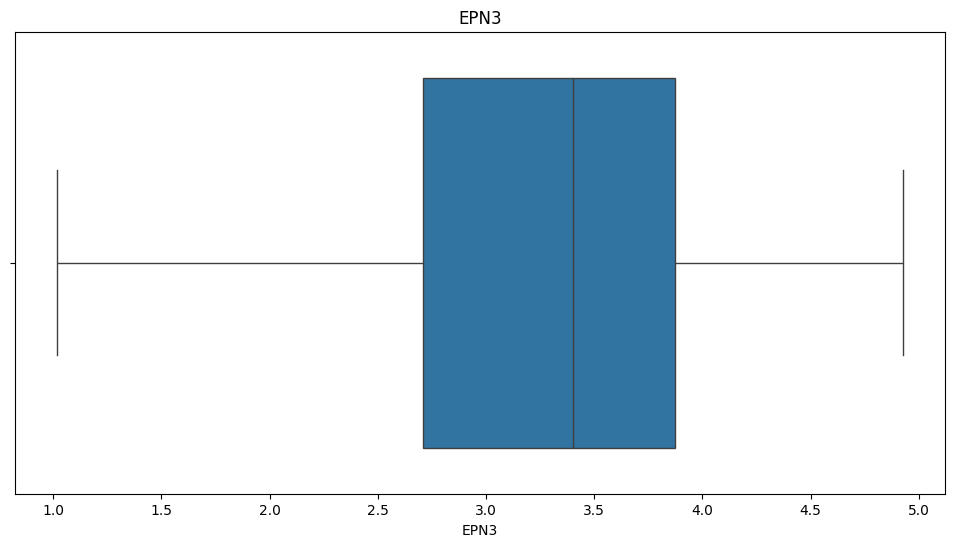

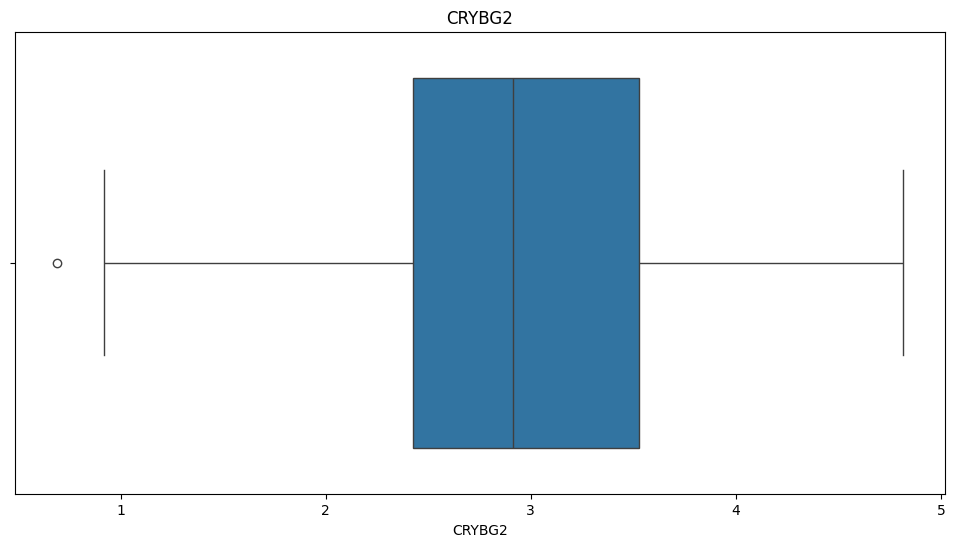

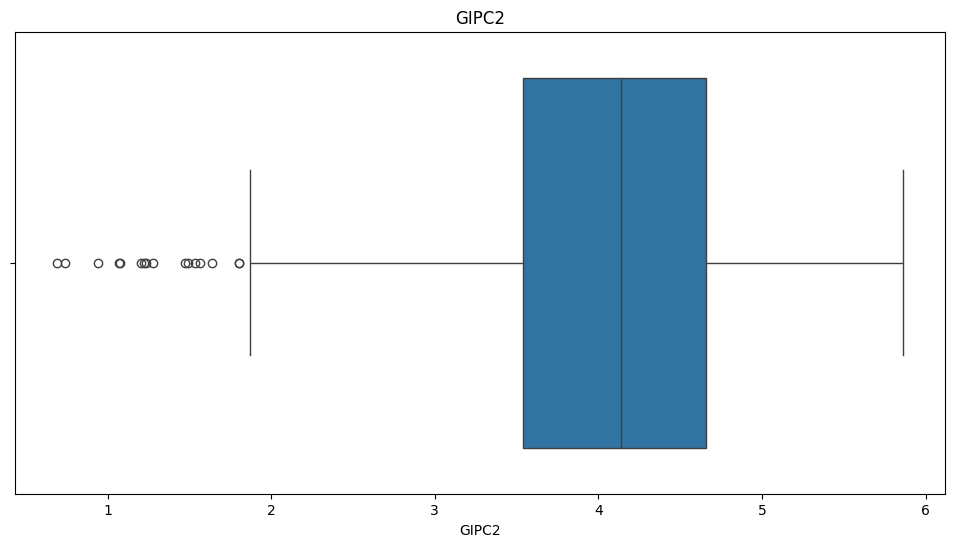

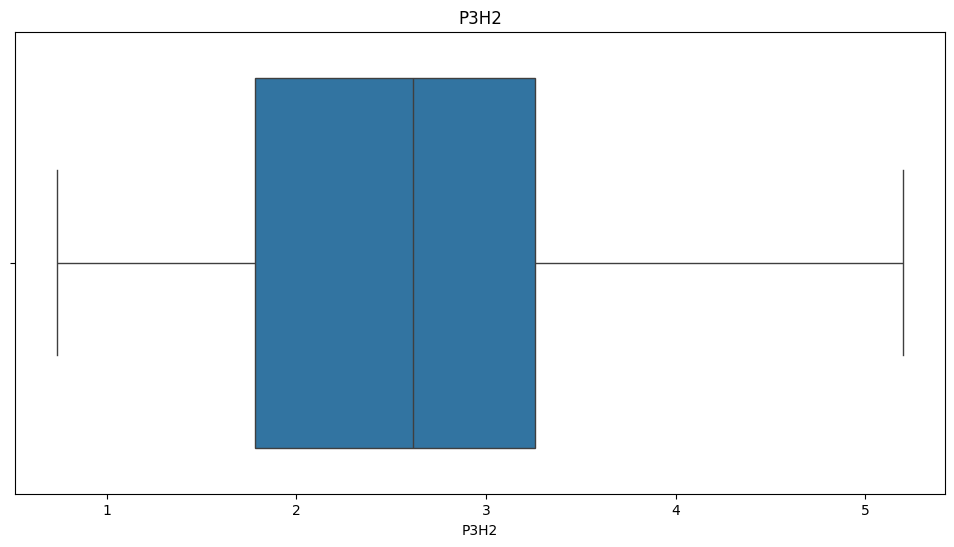

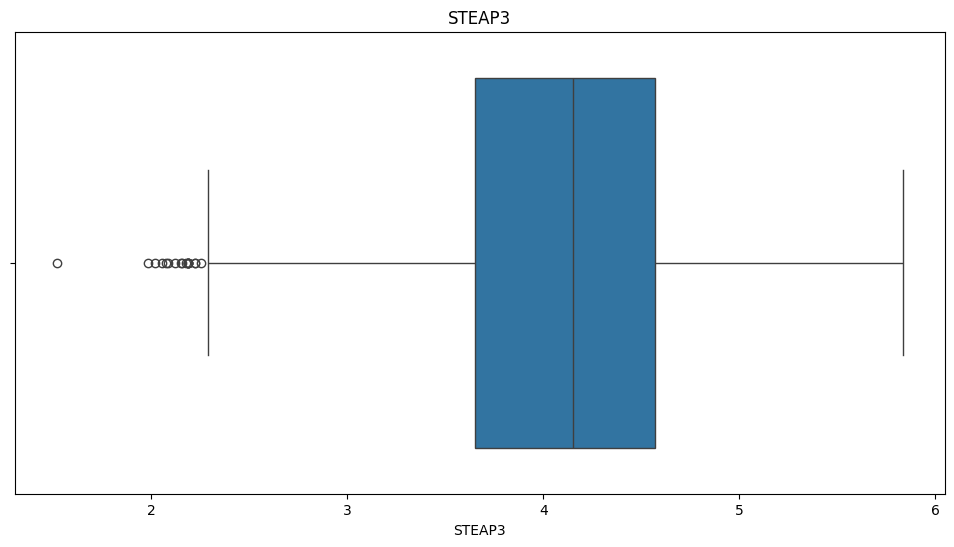

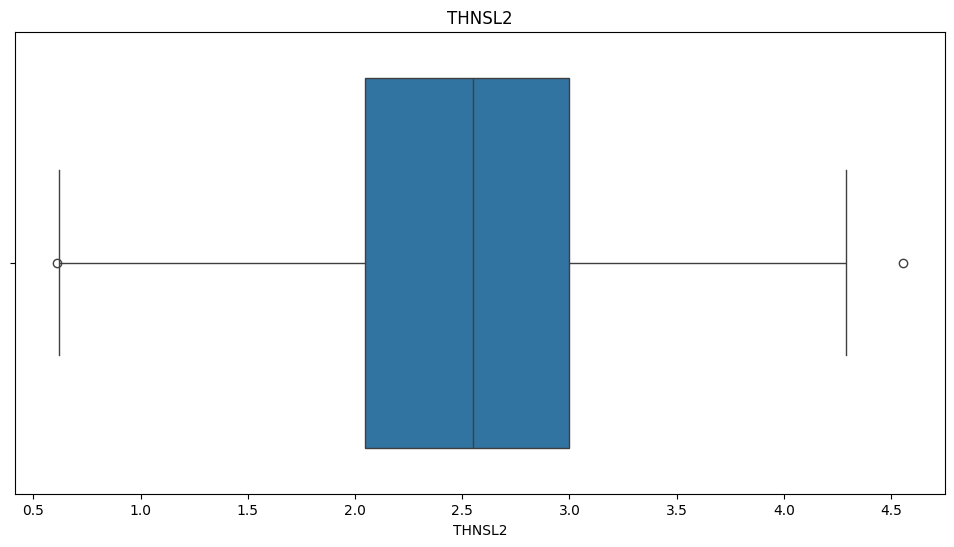

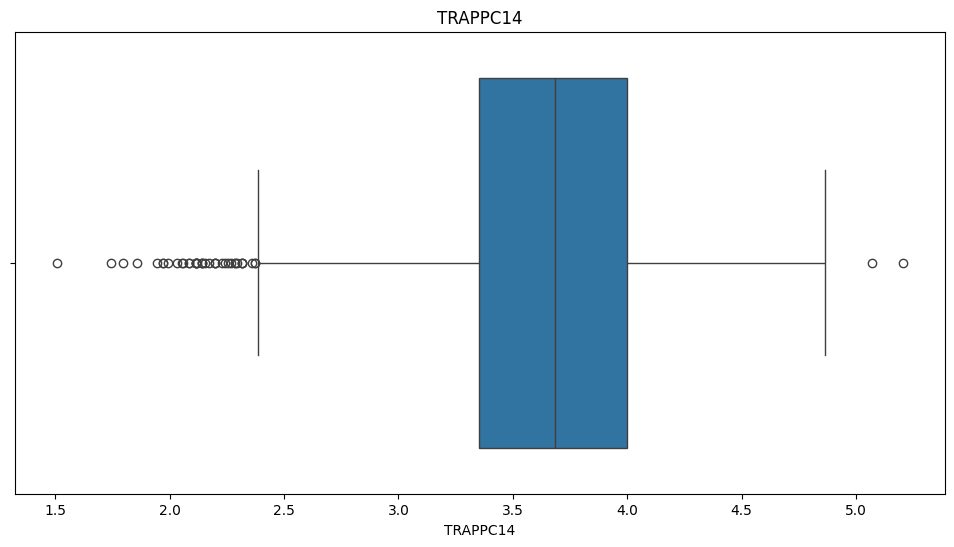

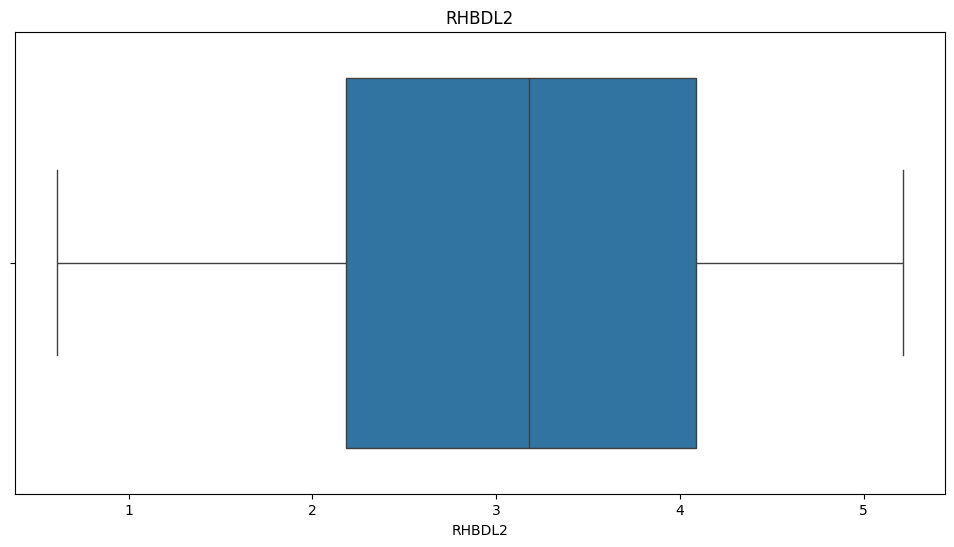

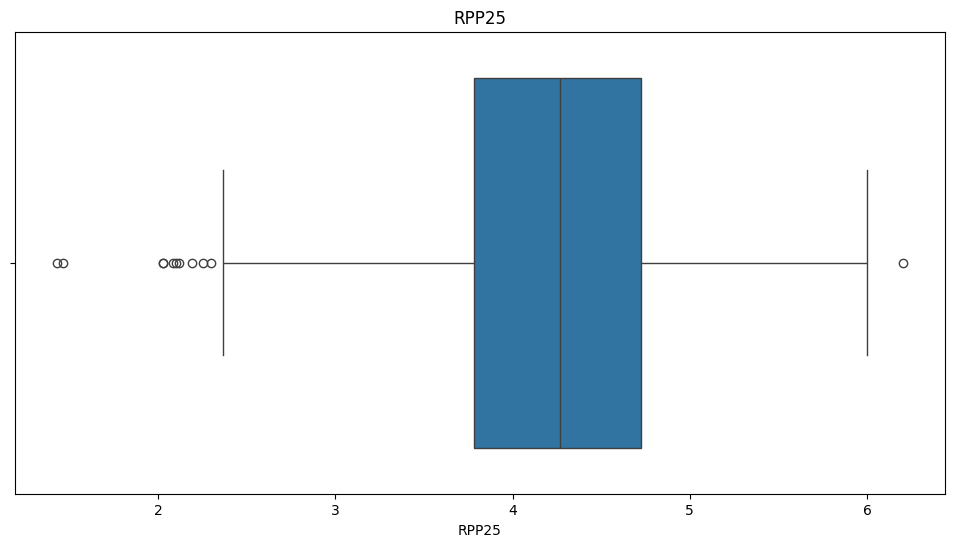

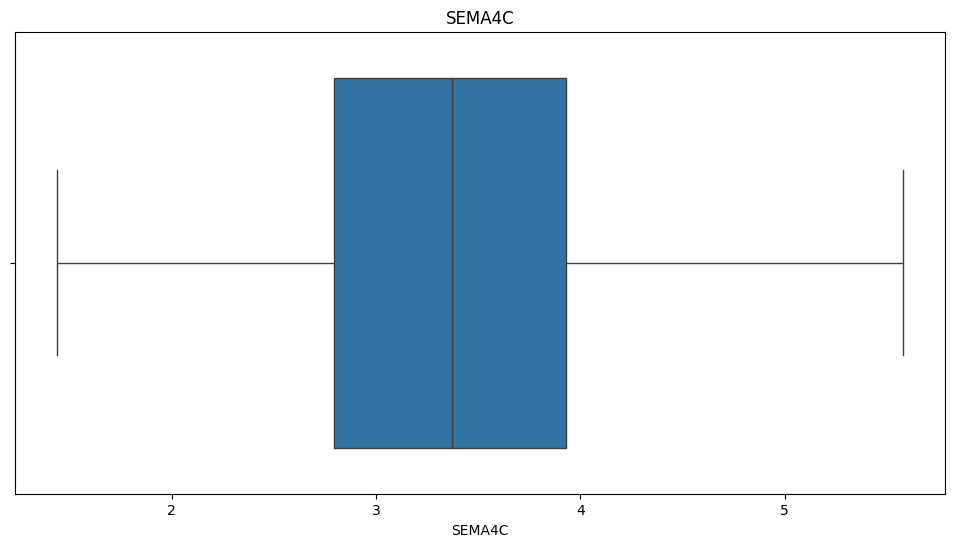

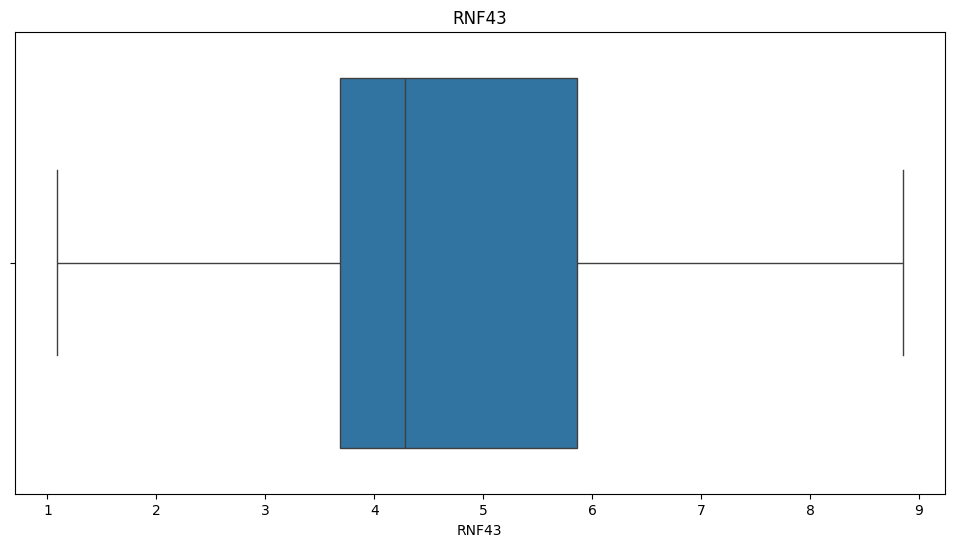

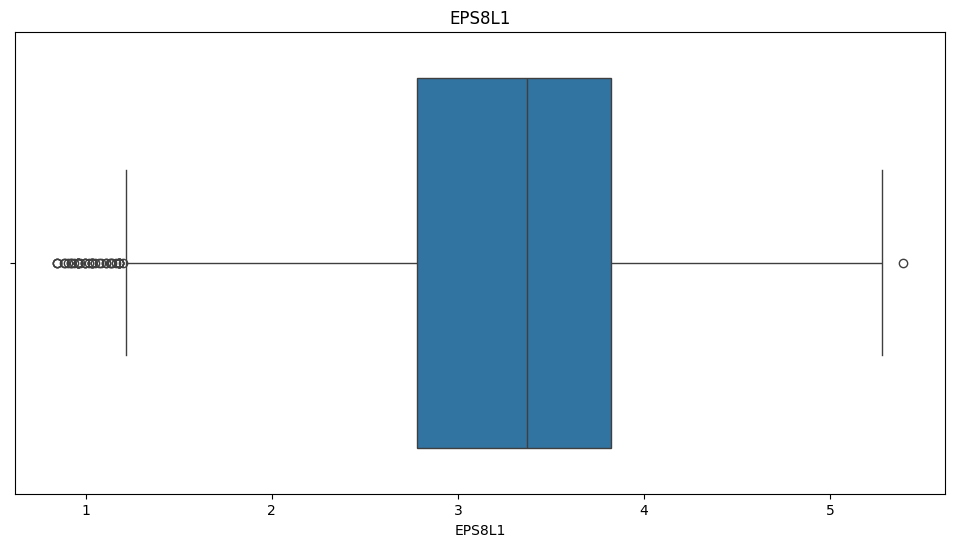

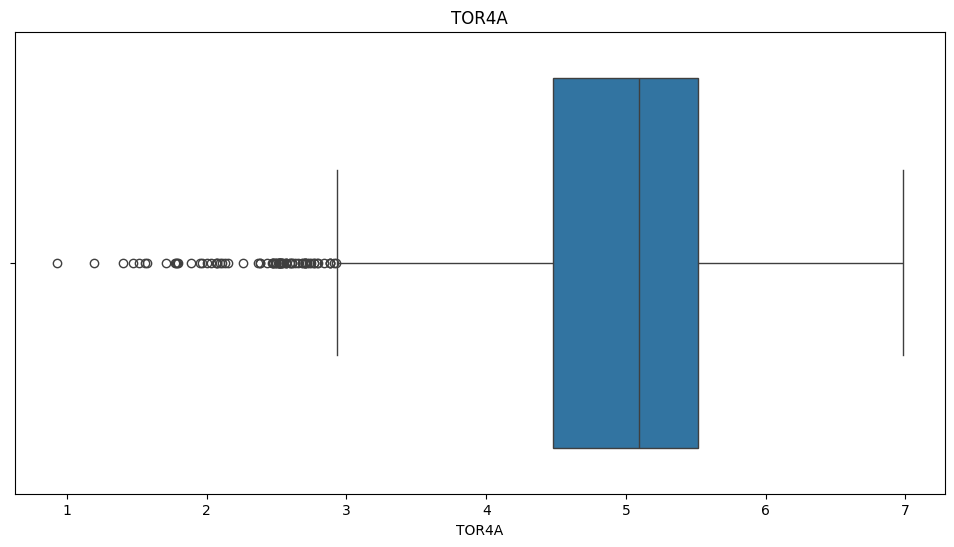

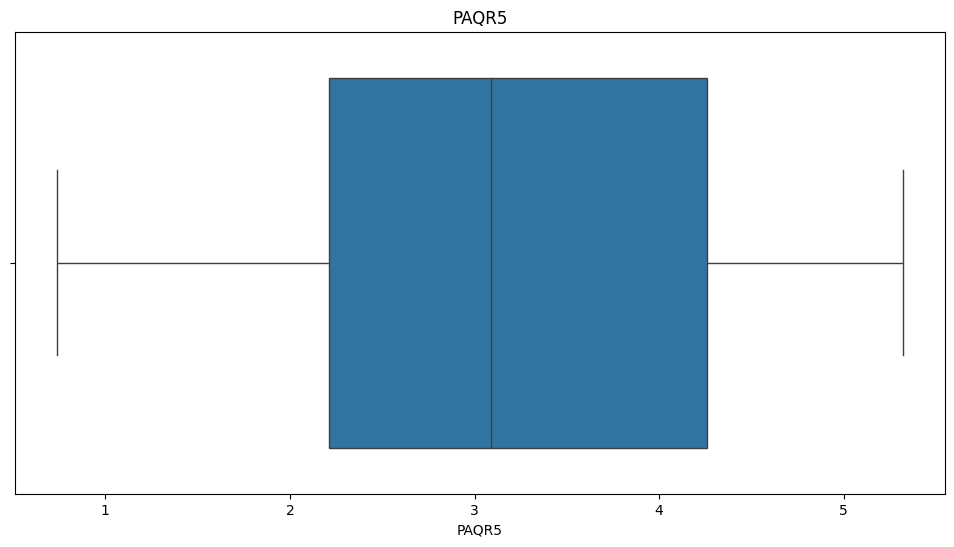

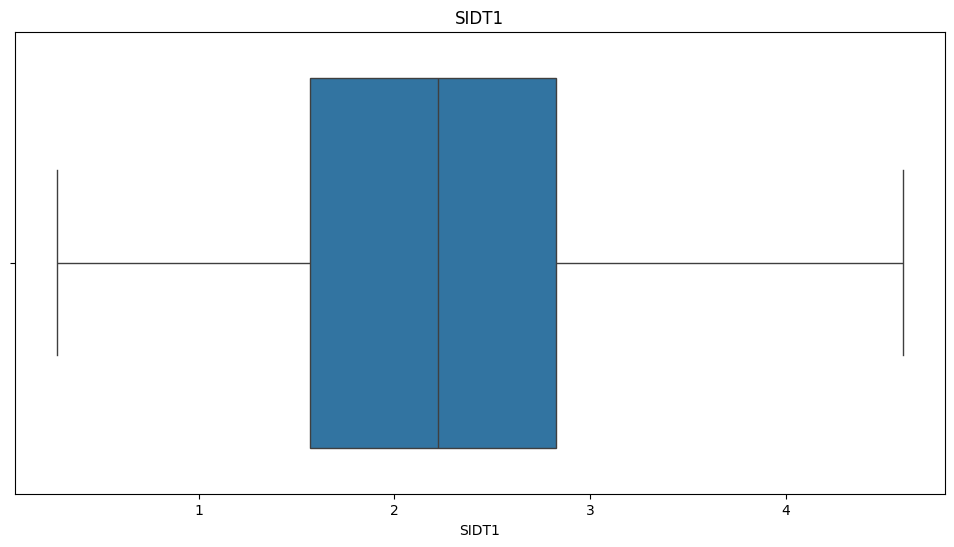

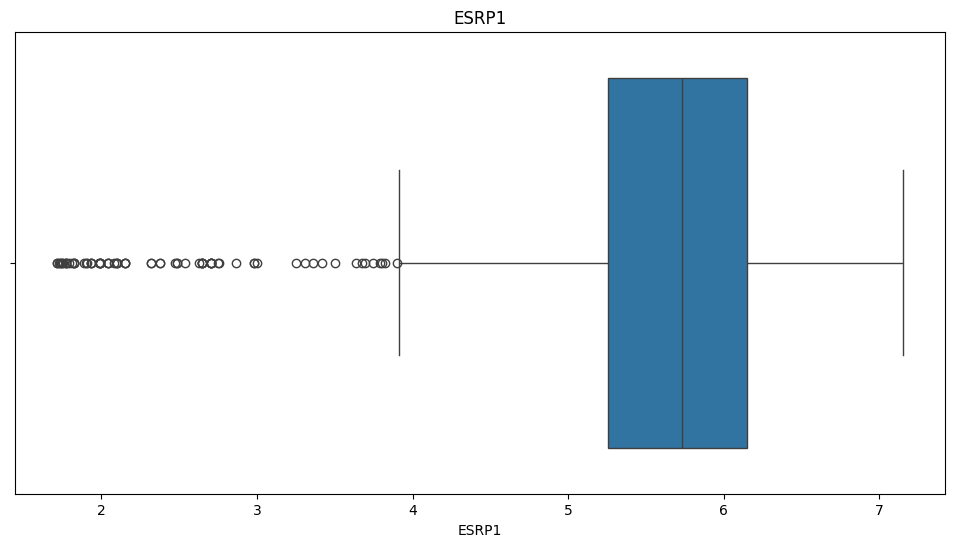

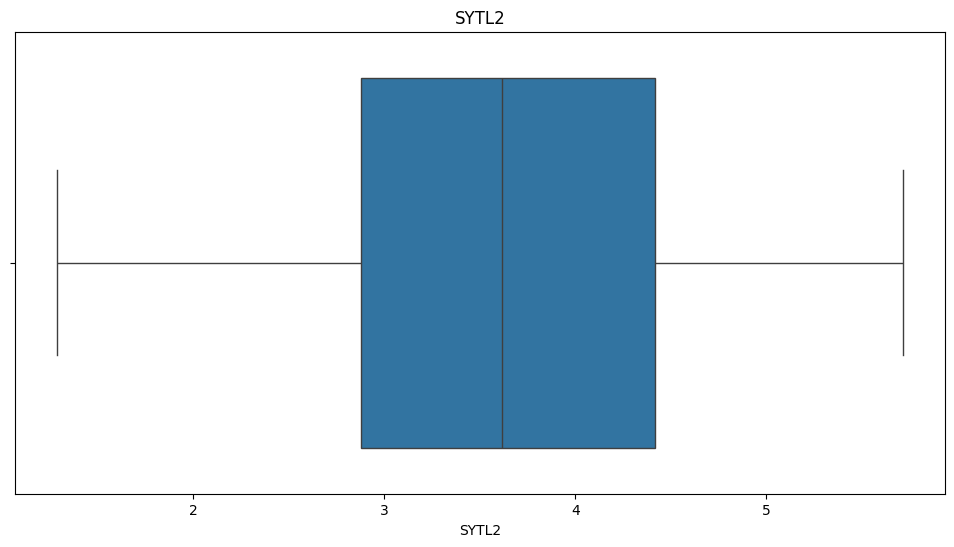

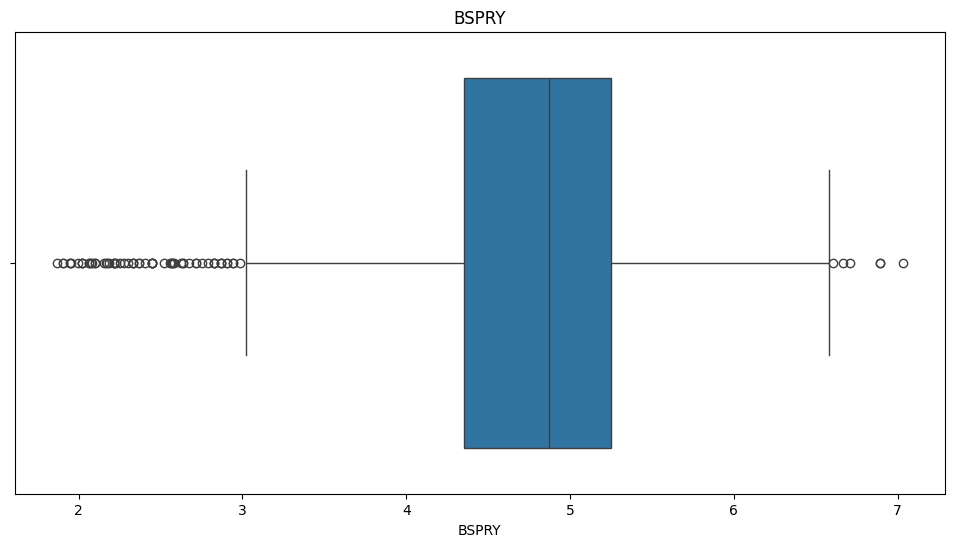

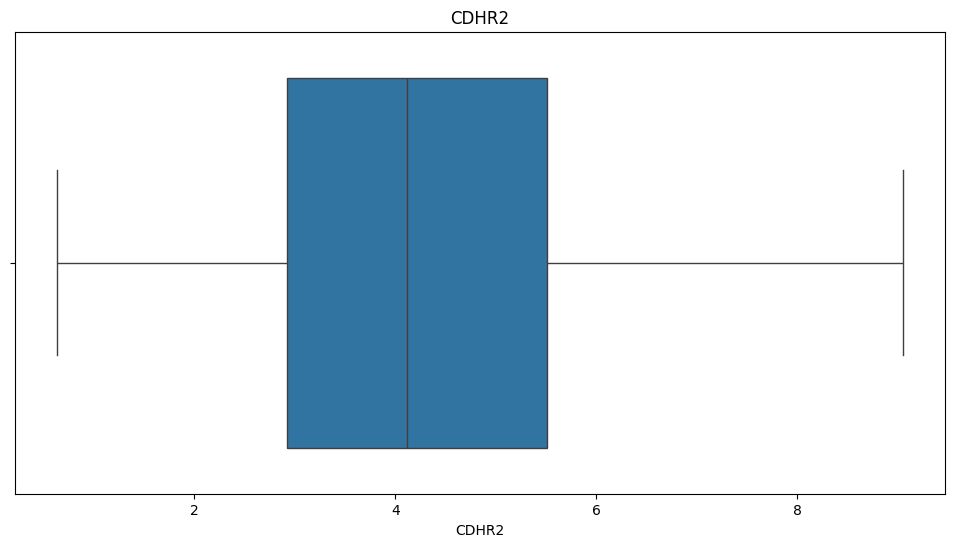

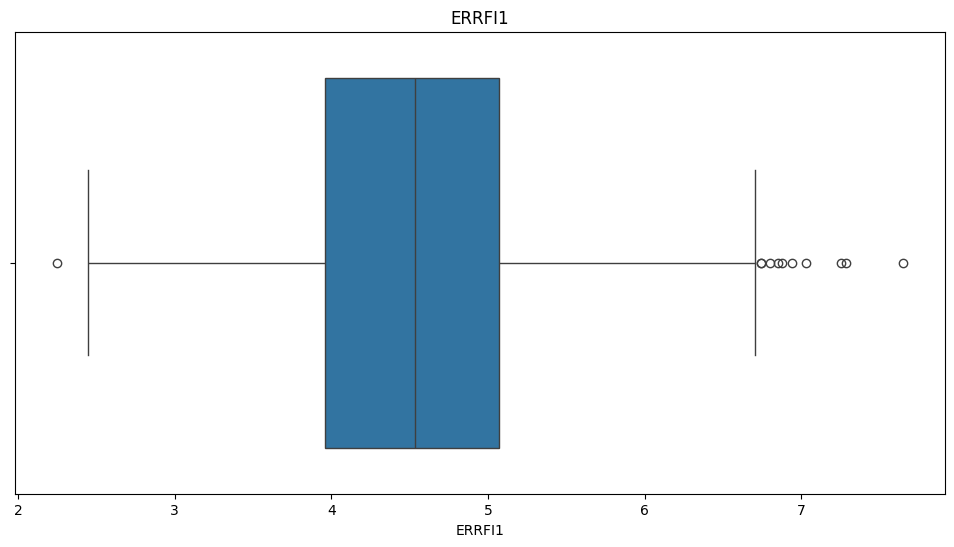

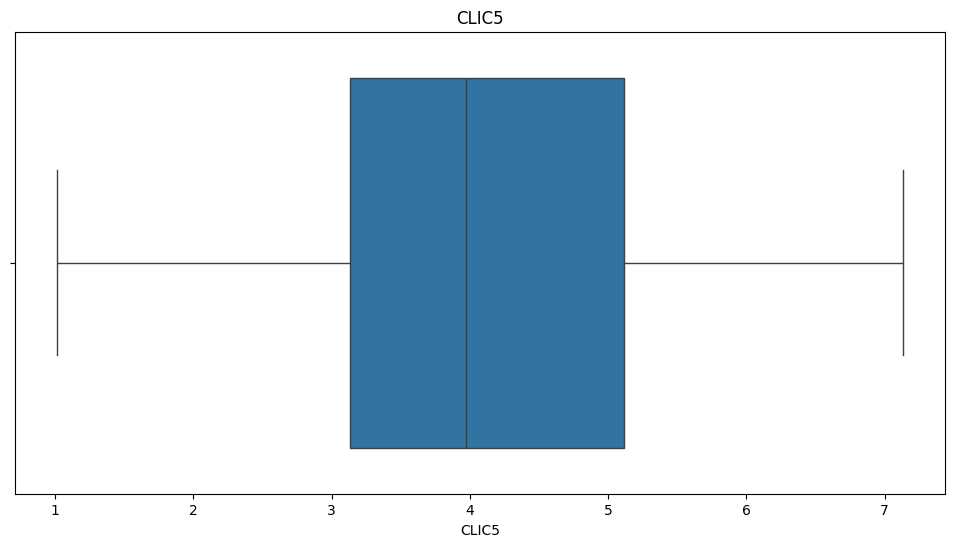

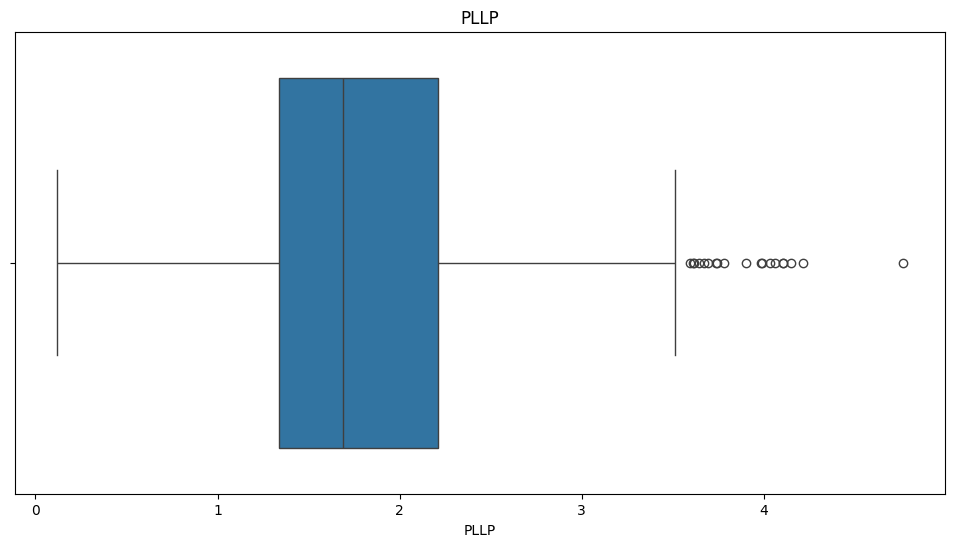

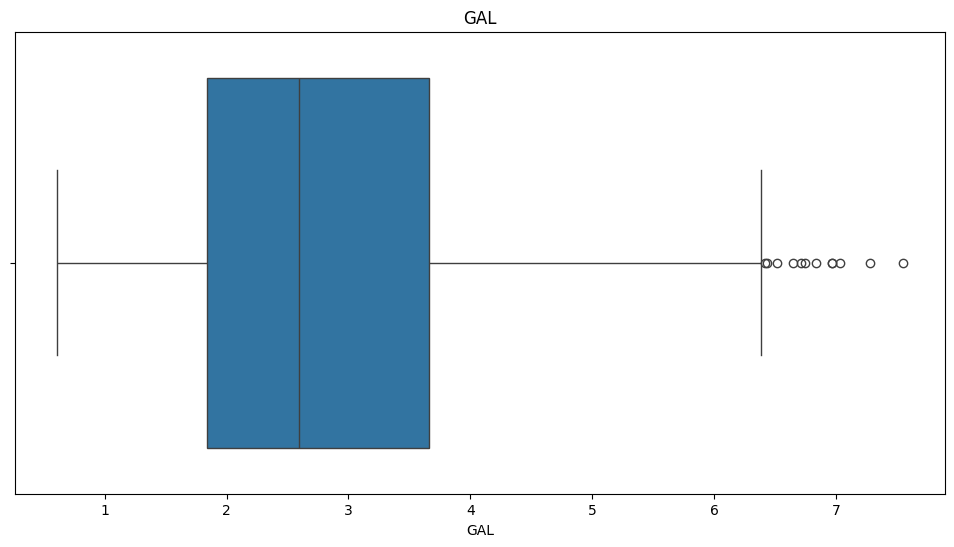

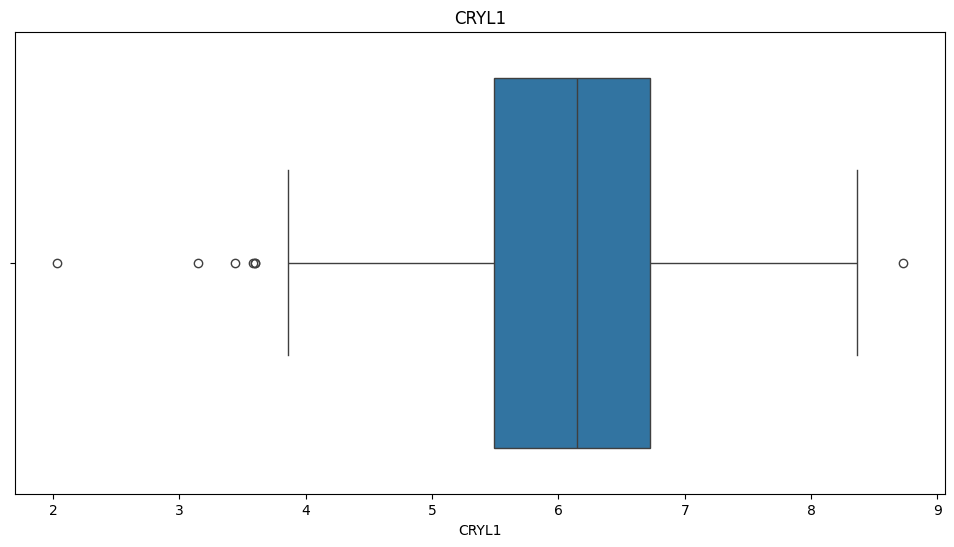

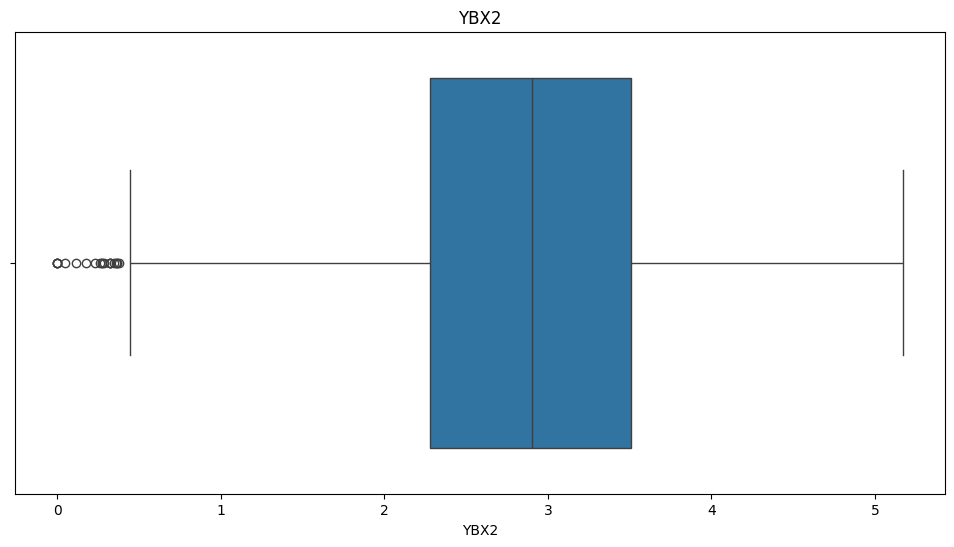

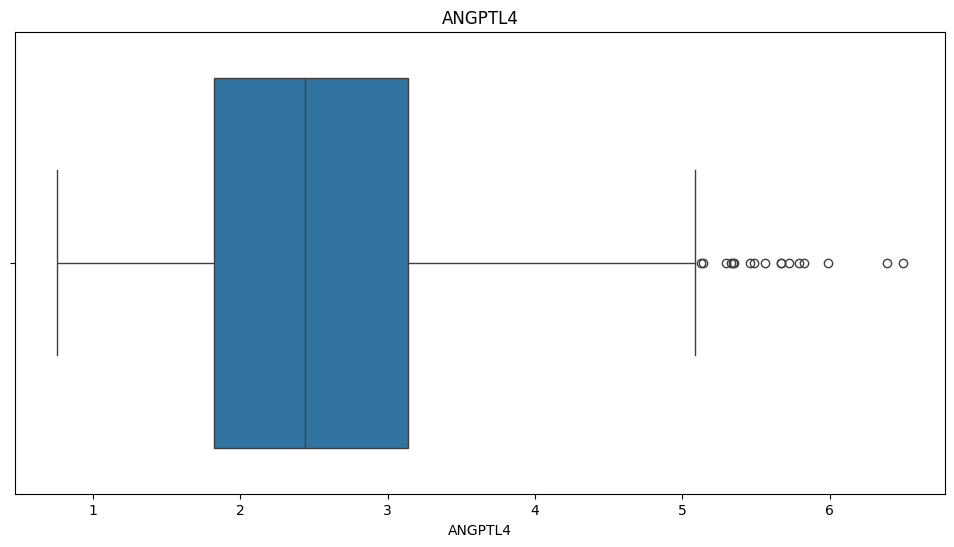

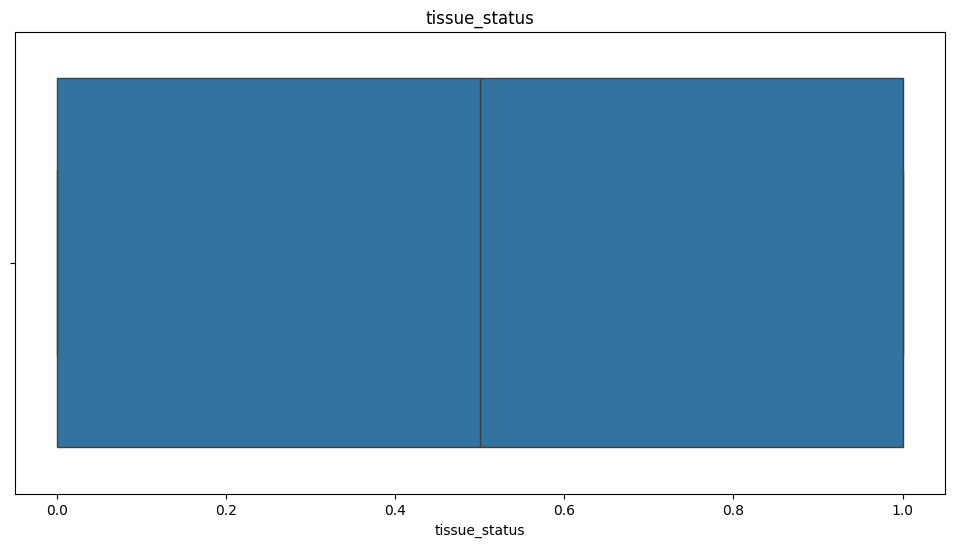

In [53]:
#Boxplots pour evaluer les outliers(valeurs aberrantes)
features=df.drop(['tissue_status'],axis=1)
for col in df.columns:
  fig,ax=plt.subplots(figsize=(12,6))
  sns.boxplot(x=df[col],ax=ax)
  plt.title(col)
  plt.show()

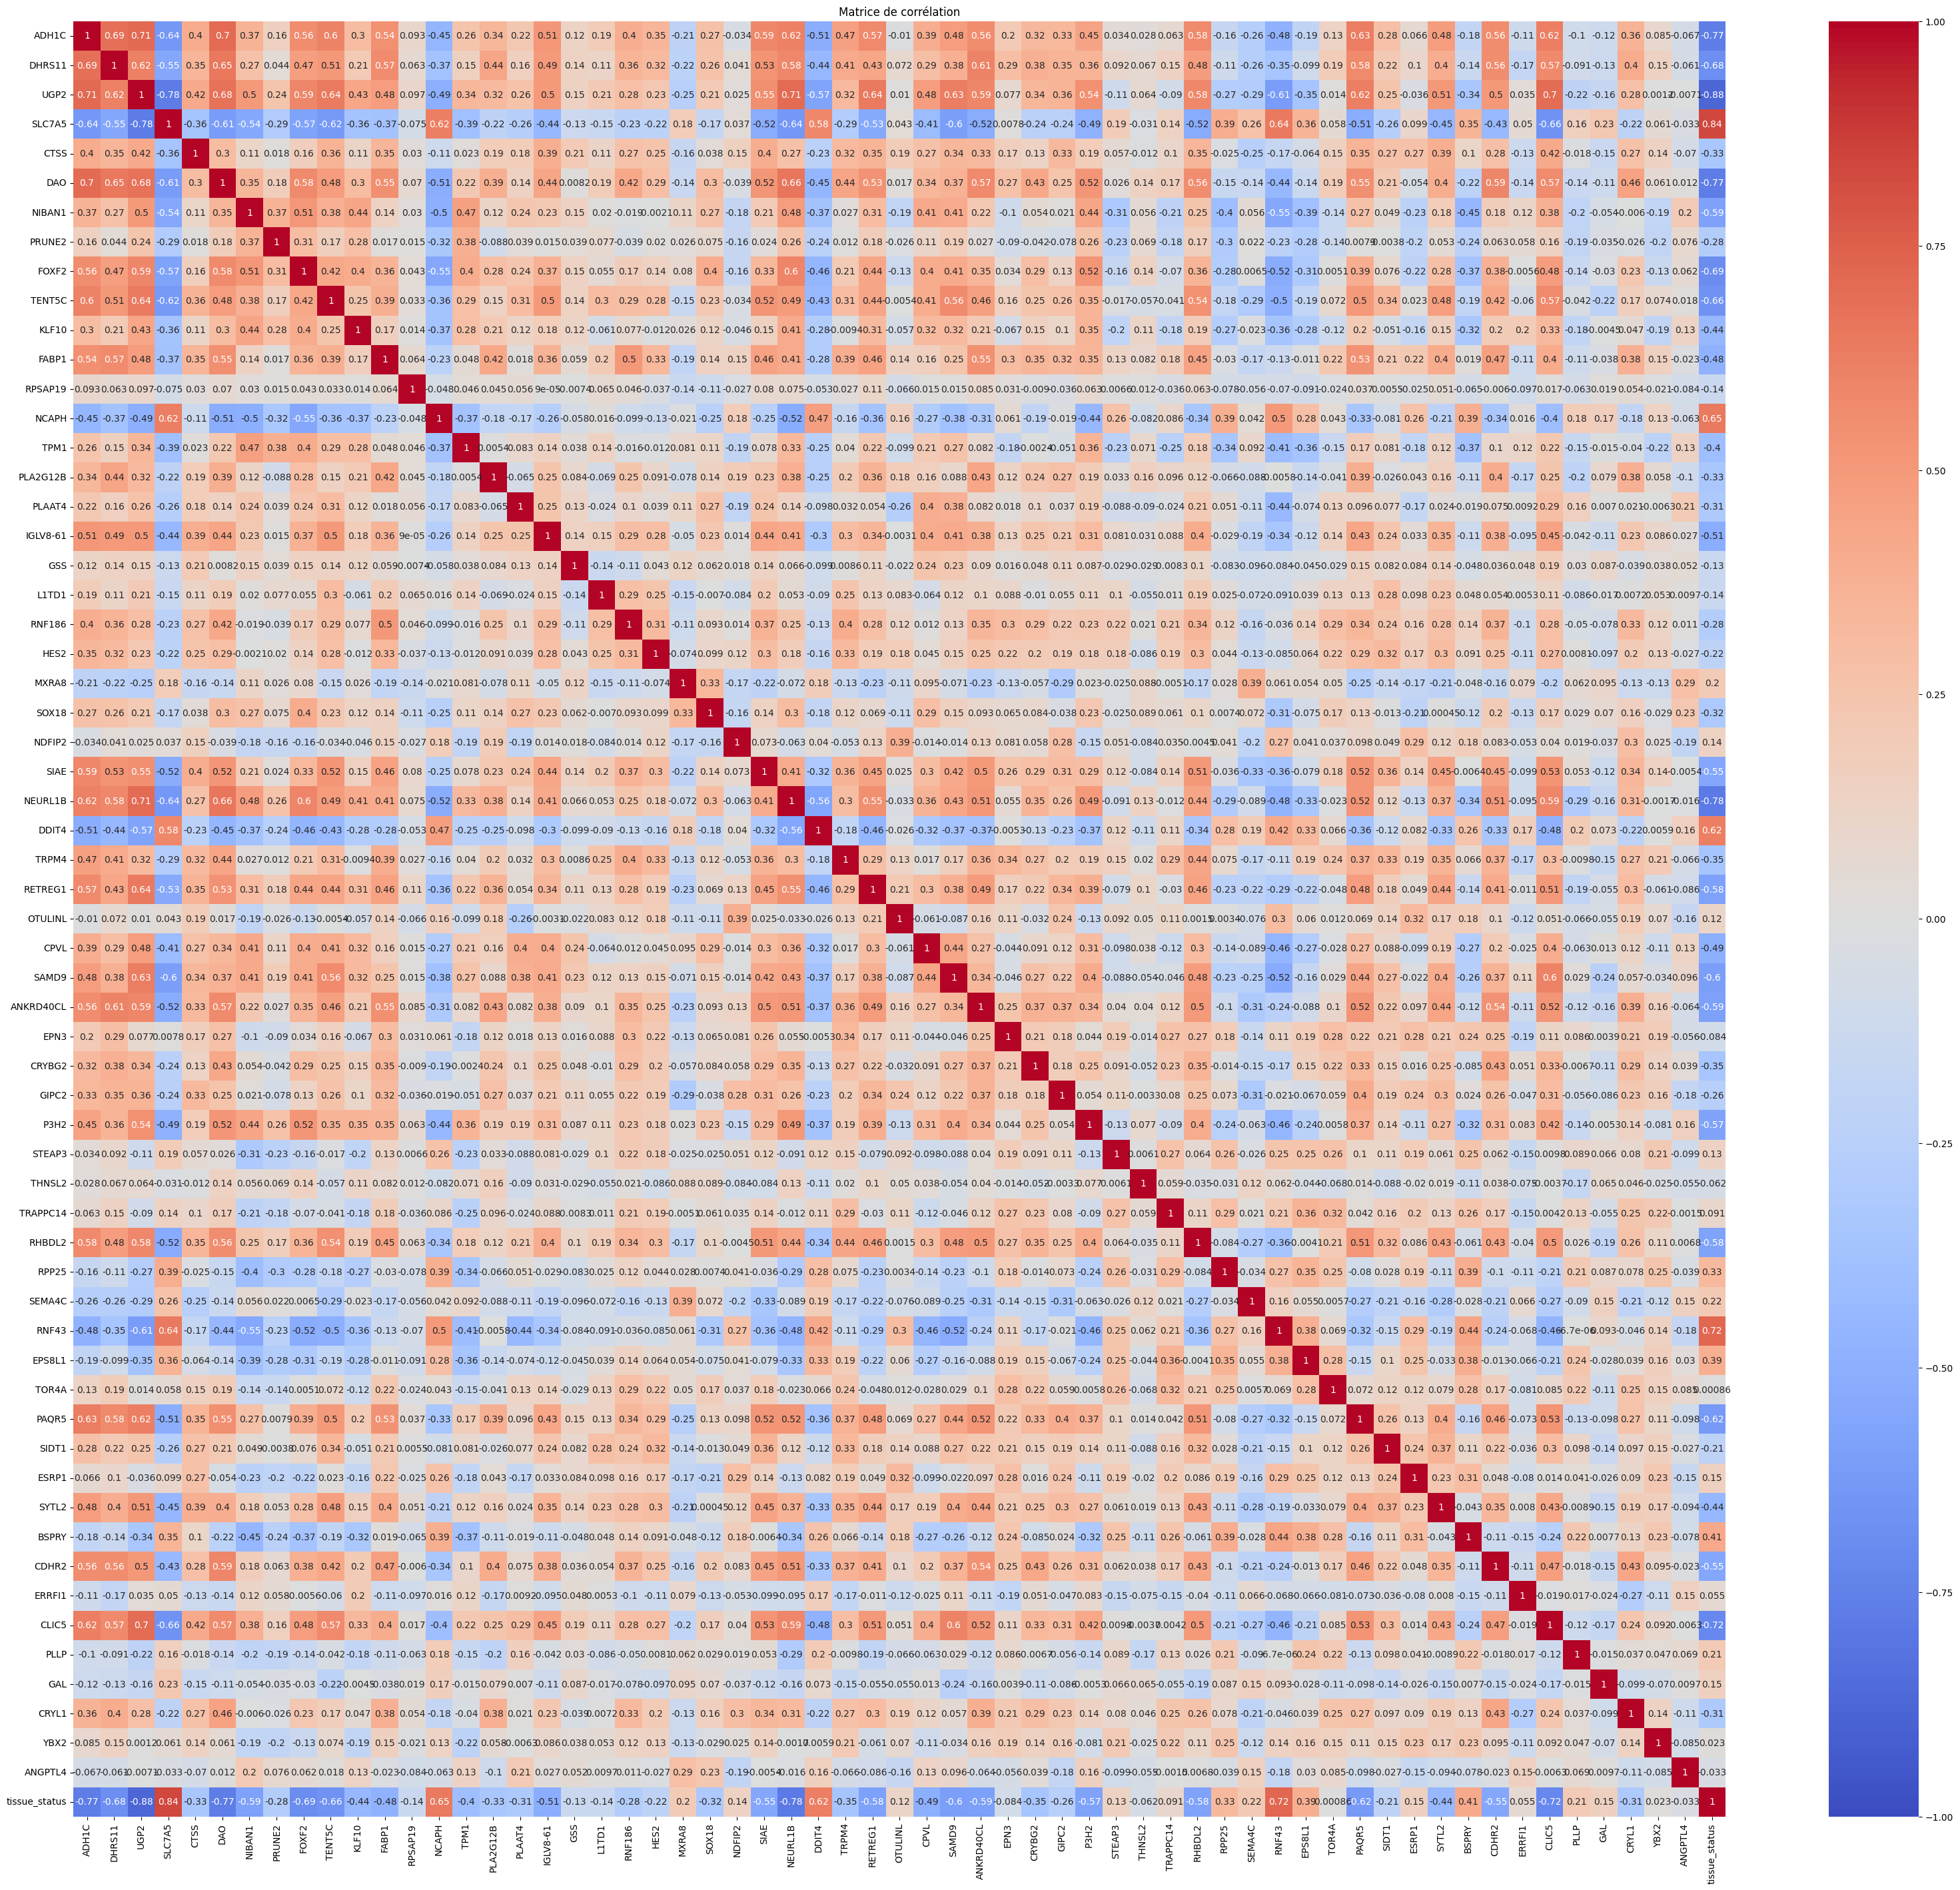

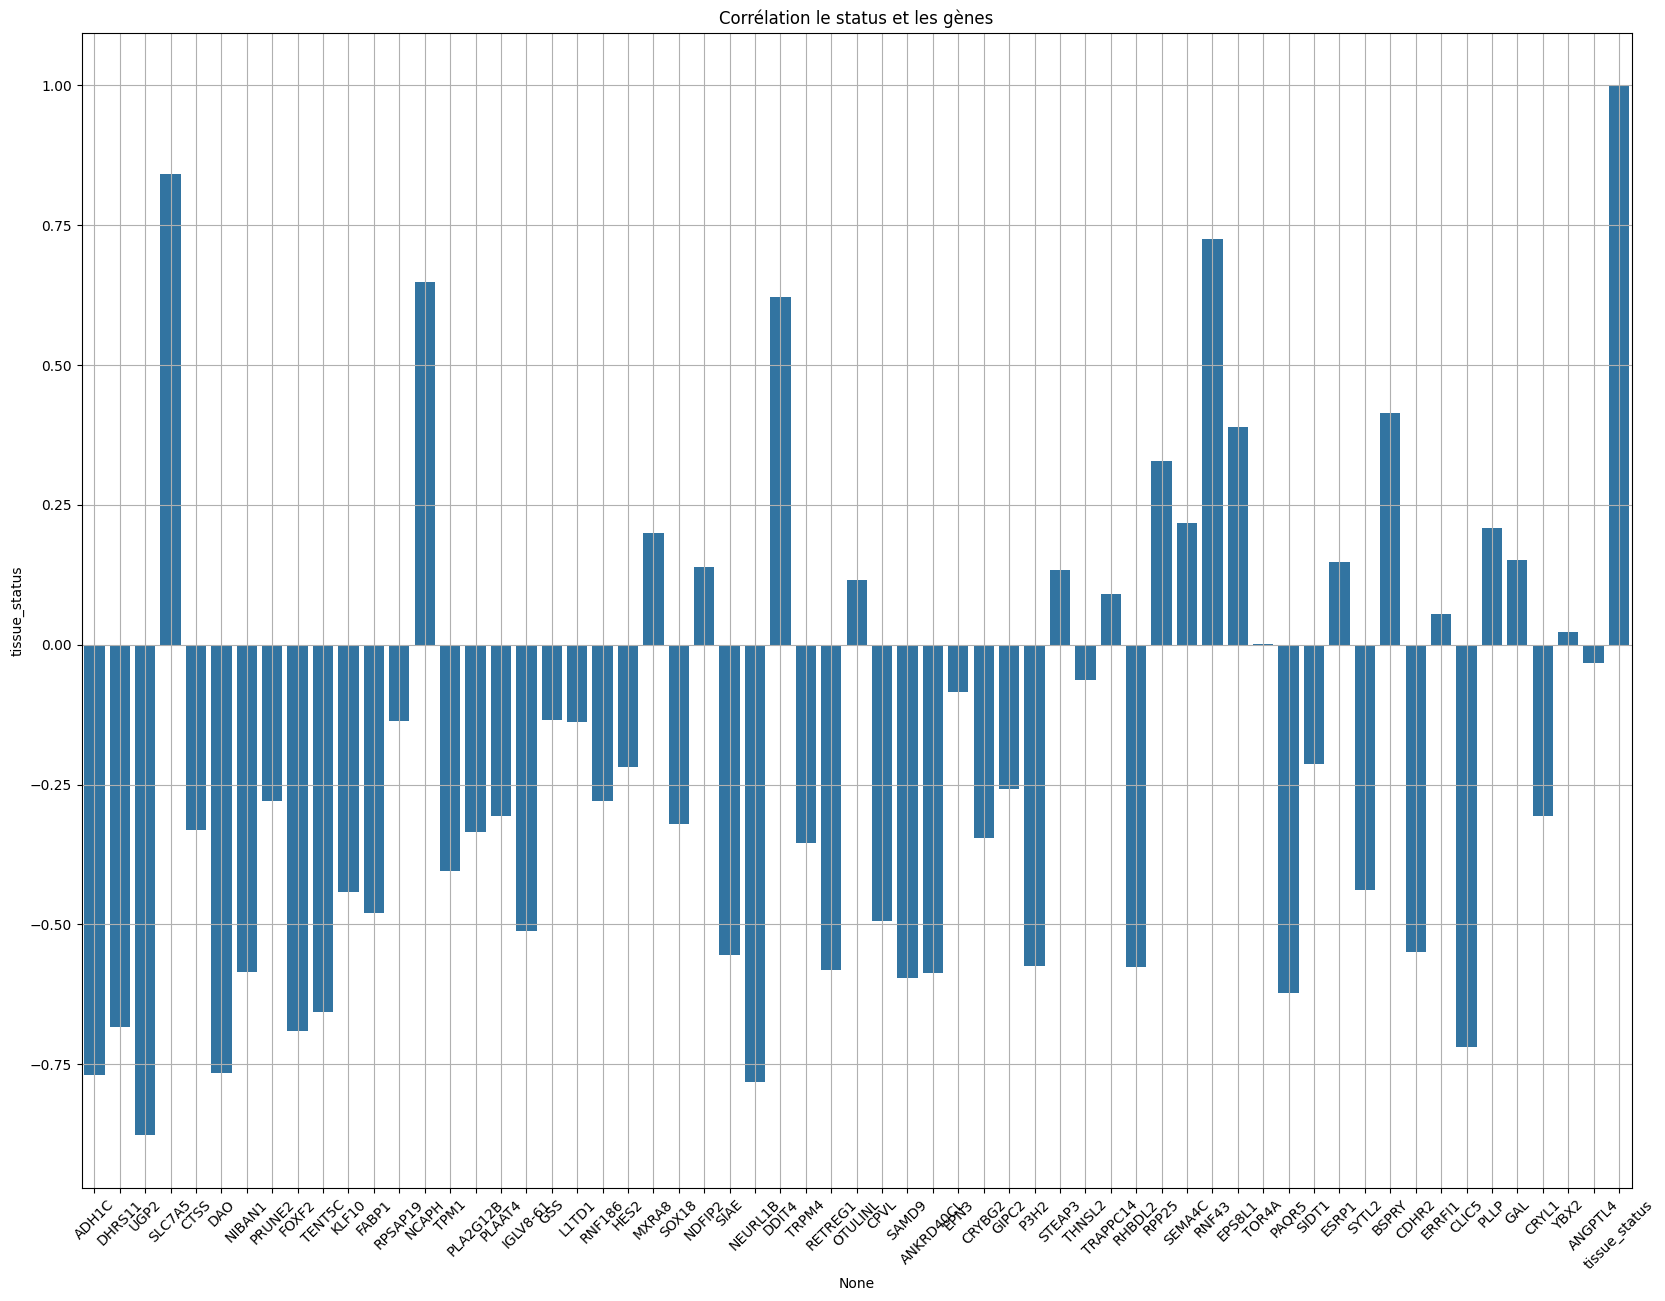

In [54]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Visualisation avec heatmap (matrice de corrélation)
plt.figure(figsize=(40, 35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation')
plt.show()

# Visualisation des corrélations les plus significatives avec le status
plt.figure(figsize=(20, 15))
sns.barplot(x=correlation_matrix['tissue_status'].index, y=correlation_matrix['tissue_status'])
plt.title('Corrélation le status et les gènes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

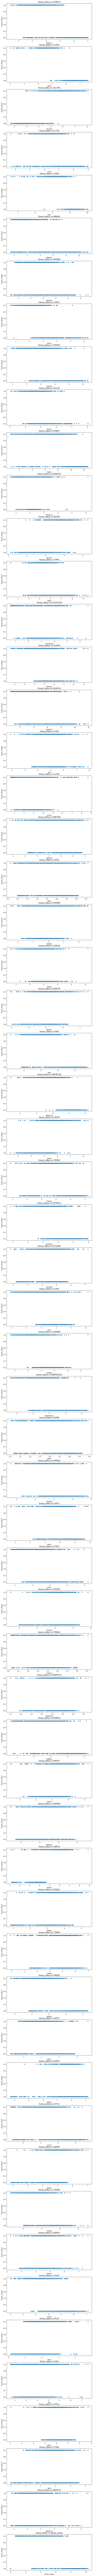

<Figure size 1500x800 with 0 Axes>

In [55]:
# Obtenir la liste des colonnes
columns = df.columns.tolist()

# Créer une figure avec des sous-graphiques
fig, axes = plt.subplots(nrows=len(columns)-1, ncols=1, figsize=(10, 5*len(columns)))
plt.figure(figsize=(15, 8))
# Tracer 'price' en fonction de chaque autre colonne
for i, column in enumerate(columns):
    if column != 'price':
        df.plot(kind='scatter', x=column, y='tissue_status', ax=axes[i-1], title=f'tissue_status vs {column}')

plt.tight_layout()
plt.show()

**3.Application des algorithmes de classification**

In [56]:
# Diviser en 80% train et 20% test en utilisant la stratification
x_train, x_test, y_train, y_test = train_test_split(genes, target, test_size=0.2, stratify=target, random_state=42)

In [57]:
#Standarisation des grandeurs
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
print('Moyenne de chaque colonnes',scaler.mean_)
print('Ecart type de chaque colonnes',scaler.scale_)

Moyenne de chaque colonnes [5.56467414 4.3642639  5.55764464 4.5003387  6.71278466 7.21626403
 2.73313174 2.8352376  3.08720933 3.63723576 4.99027669 8.01621406
 2.1181473  3.25937851 5.73041991 2.61213157 5.10767639 4.98237438
 5.09816986 2.61199213 4.58087705 2.62664288 3.99646662 2.84059649
 5.05290271 4.71352409 4.48550332 5.24873066 5.10572989 3.86650275
 4.43690898 3.43468353 3.00104573 3.128382   3.22240411 2.93948937
 4.05860311 2.56338375 4.03895355 2.45794807 3.61221044 3.07227055
 4.19560918 3.34554672 4.59756523 3.21762101 4.80665382 3.19580133
 2.1732971  5.47537059 3.60237759 4.65679254 4.26634887 4.5934446
 4.12130103 1.79936336 2.84028008 6.10508115 2.81970359 2.6000032 ]
Ecart type de chaque colonnes [2.85795276 1.41666773 1.16032499 1.6190484  1.07983707 1.38856177
 1.44409089 1.24608923 1.1969983  1.25484057 0.73158921 2.99910918
 0.69709432 0.84859116 1.1083185  1.28733002 1.2452905  2.70580089
 0.85574091 1.45984598 1.35870398 0.89365575 0.89343176 0.74189296
 0.76

In [58]:
#Standarisation des variables
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [59]:
# Entraînement du modèle de régression logistique
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

# Entraînement du modèle SVM
svm= SVC(kernel='linear', probability=True) # Set probability=True to enable probability estimates
svm.fit(x_train_scaled, y_train)

# Faire des prédictions
yl_pred = lr.predict(x_test_scaled)

ys_pred = svm.predict(x_test_scaled)

**4.1.Evaluation de la Régression Logistique**

Accuracy_test: 1.0 Accuracy_train: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


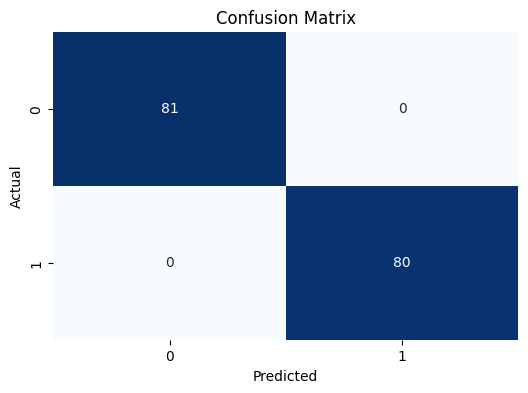

In [60]:
# Évaluation des modèles la performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix
# Évaluation des métriques
accuracy_test = accuracy_score(y_test, yl_pred)
accuracy_train = accuracy_score(y_train,lr.predict(x_train_scaled))

precision = precision_score(y_test, yl_pred)
recall = recall_score(y_test, yl_pred)
f1 = f1_score(y_test, yl_pred)
conf_matrix = confusion_matrix(y_test, yl_pred)

# Affichage des résultats
print(f"Accuracy_test: {accuracy_test} Accuracy_train: {accuracy_train}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [61]:
#Coefficients de la regression logistique
coefficients = lr.coef_[0]
print(coefficients)

[-0.46834783 -0.41299371 -0.71358682  0.87772091 -0.11748158 -0.7047429
 -0.44815895  0.01104018 -0.4624271  -0.38282107 -0.30398101 -0.20608334
 -0.15645473  0.57023127 -0.210871   -0.26791154 -0.37549827 -0.19983698
 -0.0713594   0.08524717  0.02984636  0.01534541  0.17653608 -0.34278896
  0.26152335 -0.18830874 -0.65553224  0.49180074 -0.25660942 -0.19169175
  0.19240527 -0.36606063 -0.11952365 -0.40683061  0.02217035  0.00504487
 -0.16759052 -0.17616241 -0.09390314  0.04256493  0.31991279 -0.2181729
  0.16320862 -0.00322987  0.89770207  0.33668387  0.1388942  -0.39422471
  0.06435015  0.16098336 -0.20951847  0.32095672 -0.17997146  0.14124733
 -0.45409613  0.18765215 -0.04756789 -0.33239914  0.09628316  0.0114996 ]


In [62]:
len(coefficients)

60

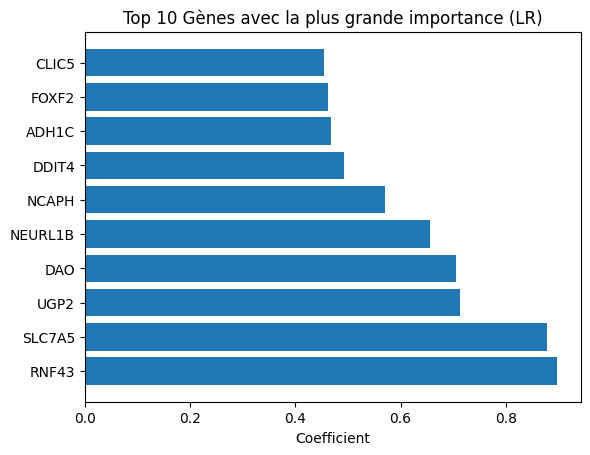

In [63]:
#Top 10 des gènes avec le plus grand impact sur la probabilité sur le LR
feature_names = np.array(x_train.columns)
sorted_idx = np.argsort(np.abs(coefficients))[::-1]  # trier par importance
plt.barh(feature_names[sorted_idx][:10], np.abs(coefficients[sorted_idx][:10]))
plt.xlabel("Coefficient")
plt.title("Top 10 Gènes avec la plus grande importance (LR)")
plt.show()

In [64]:
print(np.abs(coefficients[sorted_idx][:4]))

[0.89770207 0.87772091 0.71358682 0.7047429 ]


**4.1.Evaluation du SVM**

Accuracy_svm_test: 1.0 Accuracy_svm_train: 1.0
Precision (SVM): 1.0
Recall (SVM): 1.0
F1-Score (SVM): 1.0


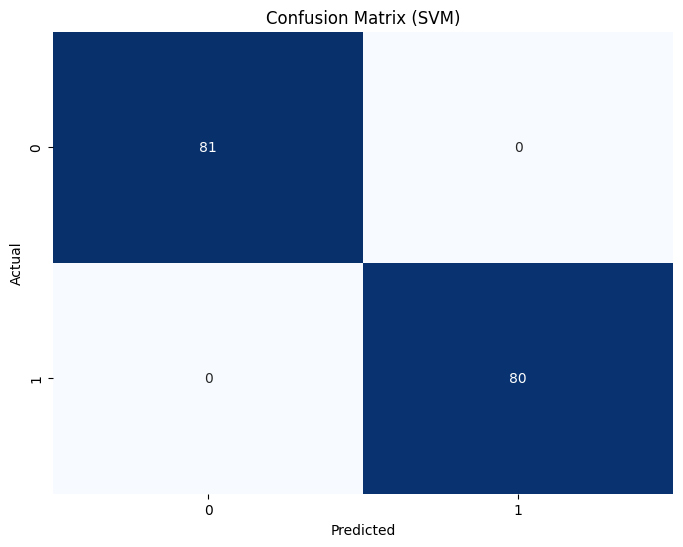

In [65]:
# Évaluation des métriques
accuracy_svm_test = accuracy_score(y_test, ys_pred)
accuracy_train_svm = accuracy_score(y_train,svm.predict(x_train_scaled))
precision_svm = precision_score(y_test, ys_pred)
recall_svm = recall_score(y_test, ys_pred)
f1_svm = f1_score(y_test, ys_pred)
conf_matrix_svm = confusion_matrix(y_test, ys_pred)

# Affichage des résultats
print(f"Accuracy_svm_test: {accuracy_test} Accuracy_svm_train: {accuracy_train}")
print(f"Precision (SVM): {precision_svm}")
print(f"Recall (SVM): {recall_svm}")
print(f"F1-Score (SVM): {f1_svm}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

In [66]:
#Coefficients pour le SVM
coefficients_svm = svm.coef_[0]
print(coefficients_svm)

[-0.1506237  -0.09709521 -0.18523436  0.28366847 -0.05148043 -0.1995498
 -0.160994    0.05046616 -0.15874577 -0.16552379 -0.06128585 -0.03684726
 -0.032657    0.17643636 -0.05114023 -0.11324405 -0.08613234 -0.07676157
 -0.024927    0.02849286  0.02302152 -0.00869318  0.06013522 -0.10739841
  0.07328611 -0.06481462 -0.14609546  0.14301789 -0.04184915 -0.0223319
  0.02984197 -0.12144495  0.00908102 -0.1008961   0.01593501  0.08020397
 -0.07567747 -0.06128427 -0.07654488  0.04811486  0.1168406  -0.04459607
  0.070235    0.01822253  0.31279746  0.06574574  0.04384199 -0.1164602
  0.01368611  0.00045233 -0.05506311  0.07054257 -0.02489578  0.04383713
 -0.11589268 -0.01285474 -0.05189234 -0.09742615  0.08598175 -0.01507953]


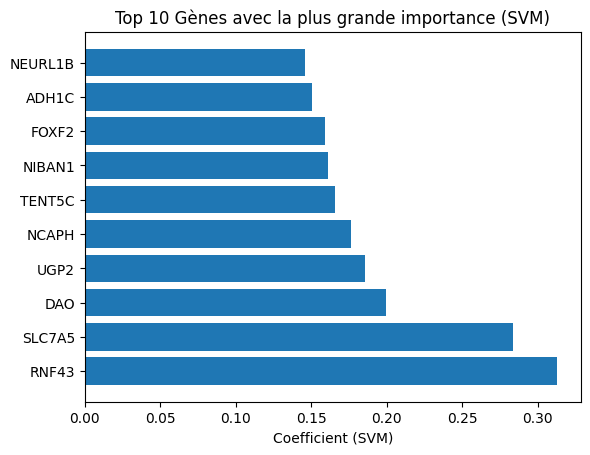

In [67]:
##Top 10 des gènes avec le plus grand impact sur la probabilité sur le LR
sorted_idx_svm = np.argsort(np.abs(coefficients_svm))[::-1]
plt.barh(feature_names[sorted_idx_svm][:10], np.abs(coefficients_svm[sorted_idx_svm][:10]))
plt.xlabel("Coefficient (SVM)")
plt.title("Top 10 Gènes avec la plus grande importance (SVM)")
plt.show()


In [68]:
# Extraction des coefficients des gènes les plus importants
sorted_idx = np.argsort(np.abs(coefficients))[::-1]
sorted_idx

array([44,  3,  2,  5, 26, 13, 27,  0,  8, 54,  6,  1, 33, 47,  9, 16, 31,
       23, 45, 57, 51, 40, 10, 15, 24, 28, 41, 14, 50, 11, 17, 30, 29, 25,
       55, 52, 22, 37, 36, 42, 49, 12, 53, 46, 32,  4, 58, 38, 19, 18, 48,
       56, 39, 20, 34, 21, 59,  7, 35, 43])

In [69]:
# Subsets des gènes importants
top_3_features = x_train[['RNF43','SLC7A5','DAO']]

x_test_top_3 = x_test[['RNF43','SLC7A5','DAO']]

In [70]:
#standarisation du top 3
scaler = StandardScaler()
scaler.fit(top_3_features)
top_3_features_scaled = scaler.transform(top_3_features)
x_test_top_3_scaled = scaler.transform(x_test_top_3)

In [71]:
# Importing the necessary library
from sklearn.metrics import classification_report

# Entraîner et évaluer la régression logistique avec top  3 features
for top_features, X_train_sub, X_test_sub in zip(
        ['top 3'],
        [top_3_features_scaled],
        [x_test_top_3_scaled]):


    # Régression logistique
    model_lr_sub = LogisticRegression()
    model_lr_sub.fit(X_train_sub, y_train)
    y_pred_lr = model_lr_sub.predict(X_test_sub)

    print(f"\nPerformance de la régression logistique avec {top_features} features:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred_lr)}")

    # SVM
    model_svm_sub = SVC(kernel='linear')
    model_svm_sub.fit(X_train_sub, y_train)
    y_pred_svm = model_svm_sub.predict(X_test_sub)

    print(f"\nPerformance du SVM avec {top_features} features:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred_svm)}")



Performance de la régression logistique avec top 3 features:
Accuracy: 0.9875776397515528
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1       0.98      1.00      0.99        80

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161


Performance du SVM avec top 3 features:
Accuracy: 0.9875776397515528
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1       0.98      1.00      0.99        80

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



Conclusion 1 : Les deux modèles ont une précision et des scores F1 très similaires avec les top 1 features. Le SVM montre un léger avantage en précision pour la classe 0 (0.92 contre 0.91).

Conclusion 2 : La régression logistique obtient une meilleure précision (0.9317 contre 0.9255) et des scores F1 plus équilibrés entre les classes 0 et 1. Ici, la régression logistique surpasse légèrement le SVM.

Conclusion 3 : La régression logistique montre ici une meilleure performance, avec une précision plus élevée (0.9876 contre 0.9814) et des scores F1 très proches de 1 pour les deux classes.


En tenant compte des résultats sur les top 1, 2, et 3 features :

    La régression logistique montre des performances globalement meilleures, surtout avec les top 2 et 3 features. Elle atteint une meilleure précision et des scores F1 plus équilibrés.
    Le SVM est proche en termes de performances, mais il est légèrement en dessous, en particulier avec plus de features.

Ainsi, pour ces données spécifiques, la régression logistique semble être le meilleur modèle.

**7.Etude de cas**

In [72]:
#Prédiction du nouveau patient
new_patient = [4.68, 4.10, 7.59]
new_patient_df = pd.DataFrame([new_patient])
new_patient_df_scaled = scaler.transform(new_patient_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [73]:
new_patient_df_scaled

array([[ 0.05466052, -0.2472679 ,  0.26915329]])

In [74]:
prediction_lr = model_lr_sub.predict(new_patient_df_scaled)
prediction_svm = model_svm_sub.predict(new_patient_df_scaled)
print("Prédiction de la régression logistique:")
if prediction_lr[0] == 0:
    print("Le patient n'a pas de cancer.")
else:
    print("Le patient a un cancer.")

print("Prédiction du SVM: ")
if prediction_svm[0] == 0:
    print("Le patient n'a pas de cancer.")
else:
    print("Le patient a un cancer.")

Prédiction de la régression logistique:
Le patient n'a pas de cancer.
Prédiction du SVM: 
Le patient n'a pas de cancer.


In [75]:
#probabilitré de prédiction
print("Probabilité de prédiction de la régression logistique:")
print(prediction_lr )
print("Probabilité de prédiction du SVM:")
print(prediction_svm)

Probabilité de prédiction de la régression logistique:
[0]
Probabilité de prédiction du SVM:
[0]


Travail en autonomie

In [76]:
# Import des bibliothèques supplémentaires pour k-NN, Arbre de décision et Forêt aléatoire
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np


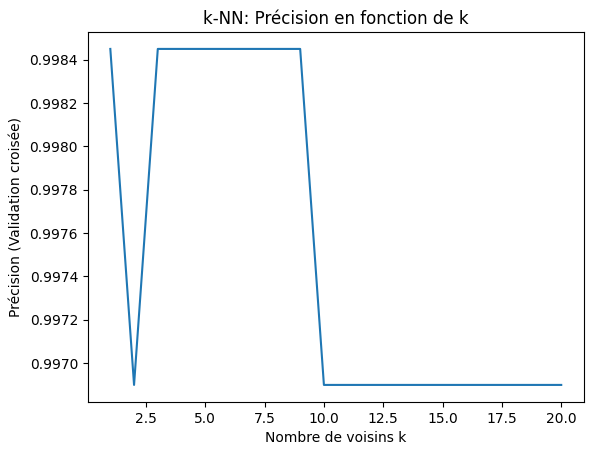

Meilleur k: 1
Rapport de classification (k-NN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        80

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



In [77]:
# k-NN avec différents nombres de voisins (k)
k_values = range(1, 21)  # Tester de 1 à 20 voisins
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_scaled, y_train, cv=5, scoring='accuracy')  # Validation croisée avec 5 plis
    k_scores.append(scores.mean())

# Visualiser la précision en fonction des valeurs de k
plt.plot(k_values, k_scores)
plt.xlabel('Nombre de voisins k')
plt.ylabel('Précision (Validation croisée)')
plt.title('k-NN: Précision en fonction de k')
plt.show()

# Sélection du meilleur k
best_k = k_values[np.argmax(k_scores)]
print(f"Meilleur k: {best_k}")

# Entraîner le modèle k-NN avec le meilleur k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train_scaled, y_train)
y_pred_knn = knn_best.predict(x_test_scaled)

# Affichage du rapport de classification
print("Rapport de classification (k-NN):")
print(classification_report(y_test, y_pred_knn))


Rapport de classification (Arbre de décision):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        81
           1       0.96      1.00      0.98        80

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161



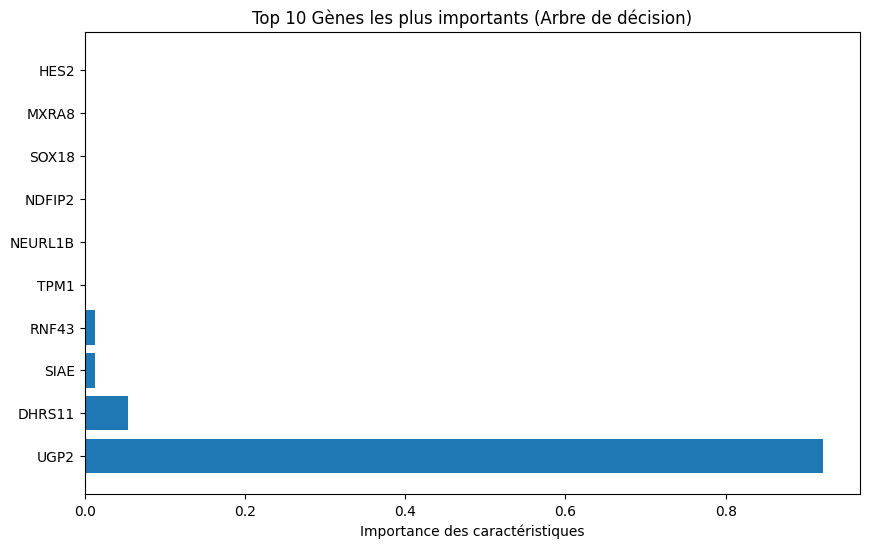

In [78]:
# Entraîner un arbre de décision
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_scaled, y_train)

# Faire des prédictions
y_pred_dt = dt.predict(x_test_scaled)

# Affichage du rapport de classification
print("Rapport de classification (Arbre de décision):")
print(classification_report(y_test, y_pred_dt))

# Importance des caractéristiques
importances_dt = dt.feature_importances_
sorted_idx_dt = np.argsort(importances_dt)[::-1]

# Visualisation des gènes les plus importants
plt.figure(figsize=(10, 6))
plt.barh(genes.columns[sorted_idx_dt][:10], importances_dt[sorted_idx_dt][:10])
plt.xlabel('Importance des caractéristiques')
plt.title('Top 10 Gènes les plus importants (Arbre de décision)')
plt.show()


Rapport de classification (Forêt Aléatoire):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1       0.98      1.00      0.99        80

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



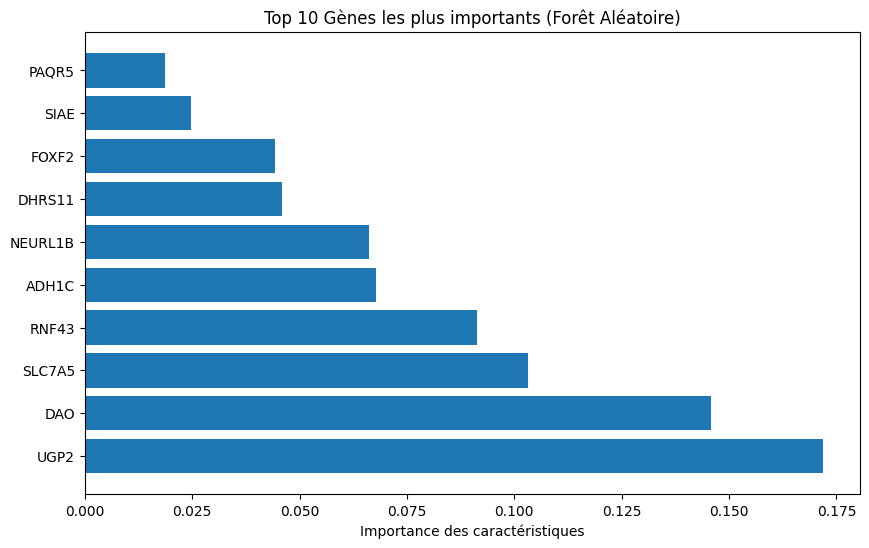

In [79]:
# Entraîner une forêt aléatoire
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)

# Faire des prédictions
y_pred_rf = rf.predict(x_test_scaled)

# Affichage du rapport de classification
print("Rapport de classification (Forêt Aléatoire):")
print(classification_report(y_test, y_pred_rf))

# Importance des caractéristiques
importances_rf = rf.feature_importances_
sorted_idx_rf = np.argsort(importances_rf)[::-1]

# Visualisation des gènes les plus importants
plt.figure(figsize=(10, 6))
plt.barh(genes.columns[sorted_idx_rf][:10], importances_rf[sorted_idx_rf][:10])
plt.xlabel('Importance des caractéristiques')
plt.title('Top 10 Gènes les plus importants (Forêt Aléatoire)')
plt.show()
